# Latar Belakang

Transportation Security Administration (TSA) merupakan badan milik negara USA, Tugas utama TSA merupakan penjagaan ketat terhadap penumpang pesawat, lebih fokus untuk menghindari adanya *Aircraft Hijacking*, TSA juga terbentuk atas respons dari kejadian *9-11* (dikutip dari [wikipedia](https://en.wikipedia.org/wiki/Transportation_Security_Administration)). Selain itu tugas yang paling sering dilakukan oleh TSA adalah penyaringan dan peraturan terkait penumpang dan barang bawaan, termasuk persyaratan identifikasi, pat-down, pemindai seluruh tubuh, pembatasan perangkat elektronik, dan pemeriksaan bahan peledak. Namun, hal ini telah **memicu** adanya hal-hal yang tidak diinginkan penumpang. Badan tersebut telah menghadapi **kritik dan kontroversi** sepanjang sejarahnya untuk keefektifan prosedur tersebut, serta banyaknya tuduhan tentang **pencurian bagasi, keamanan data, dan tuduhan perlakuan buruk terhadap kelompok etnis tertentu**. Maka dari itu, penumpang banyak yang **mengajukan klaim**, dimana klaim dari perumpang tersimpan dalam data TSA agar klaim tersebut dapat di *Handle dan Resolve*

## Pernyataan Masalah

Transportation Security Adiminstration (TSA) ingin mengetahui **Hal apa yang harus di perhatikan untuk meminimalisir pembayaran klaim**, dengan mengetahui Informasi ini, TSA dapat mengurangi adanya kerugian yang tidak diinginkan.

Dengan ini, sebagai *Data Analyst*, kita akan menjawab:

"**Hal apa yang perlu di perhatikan untuk meminimalisir terjadinya pembayaran klaim?**"

# Data

Untuk menjawab pernyataan dari masalah diatas, maka kita akan mulai melakukan analisa dari data yang sudah dikumpulkan oleh TSA. 

data dapat diakses [Disini](https://drive.google.com/drive/folders/13SAQcA3QZ2FBclO1iOW31otlnBXHytYk)

Pertama-tama, kita akan import beberapa library untuk kebutuhan Cleaning dan Analisa

In [187]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px

# Formatting diberikan diatas secara langsung agar display lebih nyaman dilihat
pd.options.display.float_format = '{:.2f}'.format

# Menghilangkan warnings, agar plot terlihat lebih enak
import warnings
warnings.filterwarnings("ignore")

Dataset TSA Claims berisikan informasi mengenai waktu kejadian, airport dan airline mana, nomor klaim dan juga nilai klaimnya. 
<br>dataset ini berisi 13 Kolom, dengan definisinya masing2:

| Nama Kolom   | Definisi                                                     
|---------------|-----------------------------------------------------------------
| `Claim Number`  | Nomor unik dari setiap pengajuan klaim   
| `Date Received` | Waktu dari penerimaan klaim oleh TSA  
| `Incident Date` | Waktu dari insiden yang berujung pengajuan klaim   
| `Airport Code`  | Kode unik berdasarkan nama Airport
| `Airport Name`  | Nama Dari Airport yang dikunjungi pengaju             
| `Airline Name`  | Nama dari Airline yang dinaiki pengaju      
| `Claim Type`    | Tipe dari klaim yang diajukan pengaju                  
| `Claim Site`    | Lokasi dimana insiden terjadi              
| `Item`          | Barang dari pengajuan klaim       
| `Claim Amount`  | Jumlah yang diajukan pengaju                   
| `Status`        | Status yang berjalan saat ini   
| `Close Amount`  | Jumlah yang dibayarkan TSA kepada pengaju              
| `Disposition`   | Finalisasi status dari klaim  


Untuk memberikan gambaran jelasnya, Berikut bentuk datanya:

In [188]:
df = pd.read_csv('tsa_claims.csv')
df

Claim Number Date Received    Incident Date Airport Code  \
0       0909802M       4-Jan-02      12/12/2002 0:00  EWR           
1       0202417M       2-Feb-02      1/16/2004 0:00   SEA           
2       0202445M       4-Feb-02      11/26/2003 0:00  STL           
3       0909816M       7-Feb-02      1/6/2003 0:00    MIA           
4       2005032379513  18-Feb-02     2/5/2005 0:00    MCO           
...               ...        ...               ...    ...           
204262  2015120427297  20-Nov-15     16-Oct-15        -             
204263  2015123027969  17-Dec-15     2-Dec-15         -             
204264  2016010428072  22-Dec-15     20-Dec-15        -             
204265  2016011328300  30-Dec-15     28-Dec-15        -             
204266  2015123128015  31-Dec-15     23-Nov-15        -             

                           Airport Name          Airline Name  \
0       Newark International Airport     Continental Airlines   
1       Seattle-Tacoma International     NaN                    
2       Lambert St. Louis International  American Airlines      
3       Miami International Airport      American Airlines      
4       Orlando International Airport    Delta (Song)           
...                               ...             ...           
204262  -                                -                      
204263  -                                -                      
204264  -                                -                      
204265  -                                -                      
204266  -                                -                      

                     Claim Type       Claim Site  \
0       Property Damage          Checkpoint        
1       Property Damage          Checked Baggage   
2       Property Damage          Checked Baggage   
3       Property Damage          Checkpoint        
4       Property Damage          Checkpoint        
...                 ...                 ...        
204262  Property Damage          Checked Baggage   
204263  Property Damage          Checked Baggage   
204264  Passenger Property Loss  Checked Baggage   
204265  Passenger Property Loss  Checked Baggage   
204266  Passenger Property Loss  Checkpoint        

                                                            Item Claim Amount  \
0       Other                                                     $350.00       
1       Luggage (all types including footlockers)                 $100.00       
2       Cell Phones                                               $278.88       
3       Luggage (all types including footlockers)                 $50.00        
4       Baby - Strollers; car seats; playpen; etc.                $84.79        
...                                            ...                    ...       
204262  Baggage/Cases/Purses; Books; Magazines & Other; Clothing  -             
204263  Audio/Video; Home Decor                                   -             
204264  Clothing                                                  -             
204265  Tools & Home Improvement Supplies                         -             
204266  Personal Accessories                                      -             

          Status Close Amount      Disposition  
0       Approved  $350.00      Approve in Full  
1       Settled   $50.00       Settle           
2       Settled   $227.92      Settle           
3       Approved  $50.00       Approve in Full  
4       Approved  $84.79       Approve in Full  
...          ...      ...                  ...  
204262  -         NaN          NaN              
204263  -         NaN          NaN              
204264  -         NaN          NaN              
204265  -         NaN          NaN              
204266  -         NaN          NaN              

[204267 rows x 13 columns]

## Data Exploration dan Data Cleaning

*Data Exploration or Data Understanding* diperlukan di awal sebelum melakukan analisa, disini saya akan memahami data secara menyeluruh dan akan mendeteksi anomali-anomali ataupun kejanggalan dalam data ini, dan setelah data-data anomali sudah terdeteksi, saya akan melakukan *data cleaning* dimana anomali-anomali tersebut akan di bersihkan dengan cara menghapus ataupun melakukan imputasi data. untuk itu saya akan awali dengan melihat informasi secara menyeluruh, berikut informasi dari data:

### Data Exploration

In [189]:
# Info keseluruhan data
print('Berikut informasi dari data, termasuk colomn dan juga tipenya:\n')
df.info()
# Baris dan Kolom data 
print('\n Dan juga untuk data ini memiliki baris sebanyak {} dan kolom sebanyak {}'.format(df.shape[0],df.shape[1]))

Berikut informasi dari data, termasuk colomn dan juga tipenya:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB

 Dan juga untuk data ini memiliki baris sebanyak 204267 dan kolom sebanyak 13


Selain itu, kita juga ingin melihat kondisi dari Data kita, dengan melihat total Unique, Total Missing dan persentase dari Missing:

In [190]:
# Total unik dan juga missing value data
# Buat empty list di variable a
a = []
# Lakukan for loop pada df.columns
for i in df.columns :
    # Append variable a dengan nama kolom, total missing value, dan persentase missing value
    a.append([i, df[i].nunique(),df[i].isna().sum() ,df[i].isna().sum()/df[i].count()*100])

# Buat variable tablea untuk menampung DataFrame
tablea = pd.DataFrame(columns=['Column Name', 'Number of Unique','Total Missing Value', 'Persentase Missing Value'],
                     data=a)

# Panggil tablea
tablea

Column Name  Number of Unique  Total Missing Value  \
0   Claim Number   204258            0                     
1   Date Received  4007              263                   
2   Incident Date  26807             2183                  
3   Airport Code   465               8524                  
4   Airport Name   485               8524                  
5   Airline Name   318               34374                 
6   Claim Type     11                7913                  
7   Claim Site     6                 740                   
8   Item           4704              3966                  
9   Claim Amount   36117             4043                  
10  Status         15                5                     
11  Close Amount   17162             68952                 
12  Disposition    3                 72908                 

    Persentase Missing Value  
0  0.00                       
1  0.13                       
2  1.08                       
3  4.35                       
4  4.35                       
5  20.23                      
6  4.03                       
7  0.36                       
8  1.98                       
9  2.02                       
10 0.00                       
11 50.96                      
12 55.50

Dan juga kita akan melihat sample dari tiap kolom dalam bentuk DataFrame:

In [191]:
# set kolom agar terlihat semua 
pd.set_option('display.max_colwidth', -1)
# Buat variable tableb untuk menampung DataFrame kosong 
tableb = pd.DataFrame(columns=['Column', 'Sample'])

# Iterasi dari kolom2 df
for col in df.columns:
    # ambil 10 sample random dari df
    samples = df[col].sample(n=10, random_state=101).tolist()
    # append data2 dari kolom ke Column dan sampel ke Sample
    tableb = tableb.append({'Column': col, 'Sample': samples}, ignore_index=True)

# Display the sample DataFrame
tableb

Column  \
0   Claim Number    
1   Date Received   
2   Incident Date   
3   Airport Code    
4   Airport Name    
5   Airline Name    
6   Claim Type      
7   Claim Site      
8   Item            
9   Claim Amount    
10  Status          
11  Close Amount    
12  Disposition     

                                                                                                                                                                                                                                                                                                                                           Sample  
0   [2006050505706, 2011100787655, 2010061472602, 2007010318230, 2009062260470, 2011030280797, 1205106M, 2007072428976, 2004122169875, 2005032980410]                                                                                                                                                                                              
1   [27-Apr-06, 31-Oct-11, 7-Jun-10, 29-Dec-06, 17-Jun-09, 9-Feb-11, 5-Dec-03, 20-Jul-07, 27-Oct-04, 16-Mar-05]                                                                                                                                                                                                                                    
2   [4/23/2006 0:00, 8/5/2011 8:40, 4/24/2010 0:00, 12/22/2006 0:00, 6/5/2009 0:00, 1/19/2011 11:05, 10/10/2003 0:00, 6/21/2007 0:00, 10/14/2004 0:00, 12/24/2004 0:00]                                                                                                                                                                            
3   [DCA, ZZX, JFK, ANC, DEN, LAX, LAX, IND, TUS, PVD]                                                                                                                                                                                                                                                                                             
4   [Ronald Reagan Washington National Airport, Non TSA Airport (motor vehicle), John F. Kennedy International, Ted Stevens Anchorage International Airport, Denver International Airport, Los Angeles International Airport , Los Angeles International Airport, Indianapolis International, Tucson International, TF Green Airport; Providence]  
5   [USAir, -, American Airlines  , Continental Airlines, Southwest Airlines, Delta Air Lines  , nan, Northwest Airlines, Alaska Airlines, nan]                                                                                                                                                                                                    
6   [Passenger Property Loss, Motor Vehicle, Passenger Property Loss, Passenger Property Loss, Passenger Property Loss, Passenger Property Loss, Property Damage, Property Damage, Passenger Property Loss, Property Damage]                                                                                                                       
7   [Checkpoint, Motor Vehicle, Checked Baggage, Checked Baggage, Checked Baggage, Checked Baggage, Checkpoint, Checked Baggage, Checked Baggage, Checkpoint]                                                                                                                                                                                      
8   [Cameras - Digital; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.), -, Cameras; Cosmetics & Grooming; Household Items, Currency; Other, Other, Other, Other, Bicycles, Other, Jewelry - Fine]                                                                                                                            
9   [$334.96 , $2;815.06 , $0.00 , $500.00 , $5.02 , $114.74 , $50.00 , $4;500.00 , $115.00 , $50.00 ]                                                                                                                                                                                                                      

Sampai titik ini exploration belum bisa dilakukan secara baik, dikarenakan beberapa kolom masih dalam bentuk yang salah seperti:
1. `Date Received` dan `Incident Date` masih dalam bentuk *Object*, dimana seharusnya dalam bentuk Datetime (bisa kita lakukan saat data cleaning)
2. `Claim Amount` dan `Close Amount` masih dalam bentuk *Object*, dimana seharusnya dalam bentuk Float
3. Terlihat pada bagian paling bawah dari data masih memiliki value **'-'**, dimana hal itu harus diganti dengan *NaN*

Oleh karena itu kita akan melakukan sedikit perubahan pada kolom-kolom yang masih memiliki tipe yang salah

#### Pertama adalah perubahan **'-'** menjadi NaN 

In [192]:
# menggunakan replace dan regex untuk mendeteksi single '-' dan menggantikan dengan NaN
df.replace(r'^-$', np.nan, regex=True, inplace=True)
# memastikan tidak ada perubahan pada jumlah data
print('Kelengkapan data:\nJumlah Baris "{}"\nJumlah Kolom "{}"'.format(df.shape[0],df.shape[1]))

Kelengkapan data:
Jumlah Baris "204267"
Jumlah Kolom "13"


In [193]:
# cek perubahan 
df.tail(5)

Claim Number Date Received Incident Date Airport Code Airport Name  \
204262  2015120427297  20-Nov-15     16-Oct-15     NaN          NaN           
204263  2015123027969  17-Dec-15     2-Dec-15      NaN          NaN           
204264  2016010428072  22-Dec-15     20-Dec-15     NaN          NaN           
204265  2016011328300  30-Dec-15     28-Dec-15     NaN          NaN           
204266  2015123128015  31-Dec-15     23-Nov-15     NaN          NaN           

       Airline Name               Claim Type       Claim Site  \
204262  NaN          Property Damage          Checked Baggage   
204263  NaN          Property Damage          Checked Baggage   
204264  NaN          Passenger Property Loss  Checked Baggage   
204265  NaN          Passenger Property Loss  Checked Baggage   
204266  NaN          Passenger Property Loss  Checkpoint        

                                                            Item Claim Amount  \
204262  Baggage/Cases/Purses; Books; Magazines & Other; Clothing  NaN           
204263  Audio/Video; Home Decor                                   NaN           
204264  Clothing                                                  NaN           
204265  Tools & Home Improvement Supplies                         NaN           
204266  Personal Accessories                                      NaN           

       Status Close Amount Disposition  
204262  NaN    NaN          NaN         
204263  NaN    NaN          NaN         
204264  NaN    NaN          NaN         
204265  NaN    NaN          NaN         
204266  NaN    NaN          NaN

Semua terlihat sudah aman, diketahui bahwa pada bagian bawah data tadinya masih banyak yg berbentuk **'-'**, namun hal itu sudah dirubah menjadi *NaN*

#### Kedua adalah `Claim Amount` dan `Close Amount` 

Claim amount and Closed amount dinyatakan sebagai *Object*, disini saya akan merubah seluruh kolom dari keduanya menjadi *Float* agar dapat dilakukan eksplorasi lebih lanjut

In [194]:
# Menghilangkan $ sign dan tanda ; menggunakan regex dan isinstance (agar mengekstrak yang bentuknya string)
df[['Claim Amount','Close Amount']] = df[['Claim Amount','Close Amount']] \
    .applymap(lambda x: re.sub('[^0-9\.]','', str(x)) if isinstance(x, str) else x)
# Cek perubahan 
df[['Claim Amount','Close Amount']].head()

Claim Amount Close Amount
0  350.00       350.00     
1  100.00       50.00      
2  278.88       227.92     
3  50.00        50.00      
4  84.79        84.79

Jika sudah menghilangkan *$* dan *;*
<br>Maka selanjutnya adalah merubah menjadi Float

In [195]:
# Merubah type menjadi float
df[['Claim Amount','Close Amount']] = df[['Claim Amount','Close Amount']].apply(pd.to_numeric)
# Cek perubahan
df[['Claim Amount','Close Amount']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Claim Amount  187472 non-null  float64
 1   Close Amount  135315 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB


Sekarang data dari `Claim Amount` dan `Close Amount` sudah dirubah dari data *Object* menjadi data *Float*, selain itu dollar sign ($) dan (;) juga sudah di remove

Sampai titik ini, exploration lebih lanjut bisa dilakukan, pertama kita akan lihat untuk describe dari data

In [196]:
# describe data
display(df.describe(),df.describe(include=object))

Claim Amount  Close Amount
count 187472.00        135315.00    
mean  16096380.44      98.29        
std   6928745215.17    925.83       
min   0.00             0.00         
25%   26.65            0.00         
50%   115.00           0.00         
75%   350.00           70.00        
max   3000000000000.00 250000.00

Claim Number Date Received    Incident Date Airport Code  \
count   204267         204004        202084           195302        
unique  204258         4007          26807            464           
top     2013121110011  5-Dec-03      12/27/2004 0:00  LAX           
freq    2              682           144              9596          

                         Airport Name       Airline Name  \
count   195302                         165646              
unique  484                            317                 
top     John F. Kennedy International  American Airlines   
freq    9232                           17553               

                     Claim Type       Claim Site    Item  Status Disposition  
count   196072                   203251           195878  191510  131359      
unique  10                       5                4703    14      3           
top     Passenger Property Loss  Checked Baggage  Other   Denied  Deny        
freq    117868                   159753           36908   68339   68382

array([[<Axes: title={'center': 'Claim Amount'}>,
        <Axes: title={'center': 'Close Amount'}>]], dtype=object)

<Axes: >

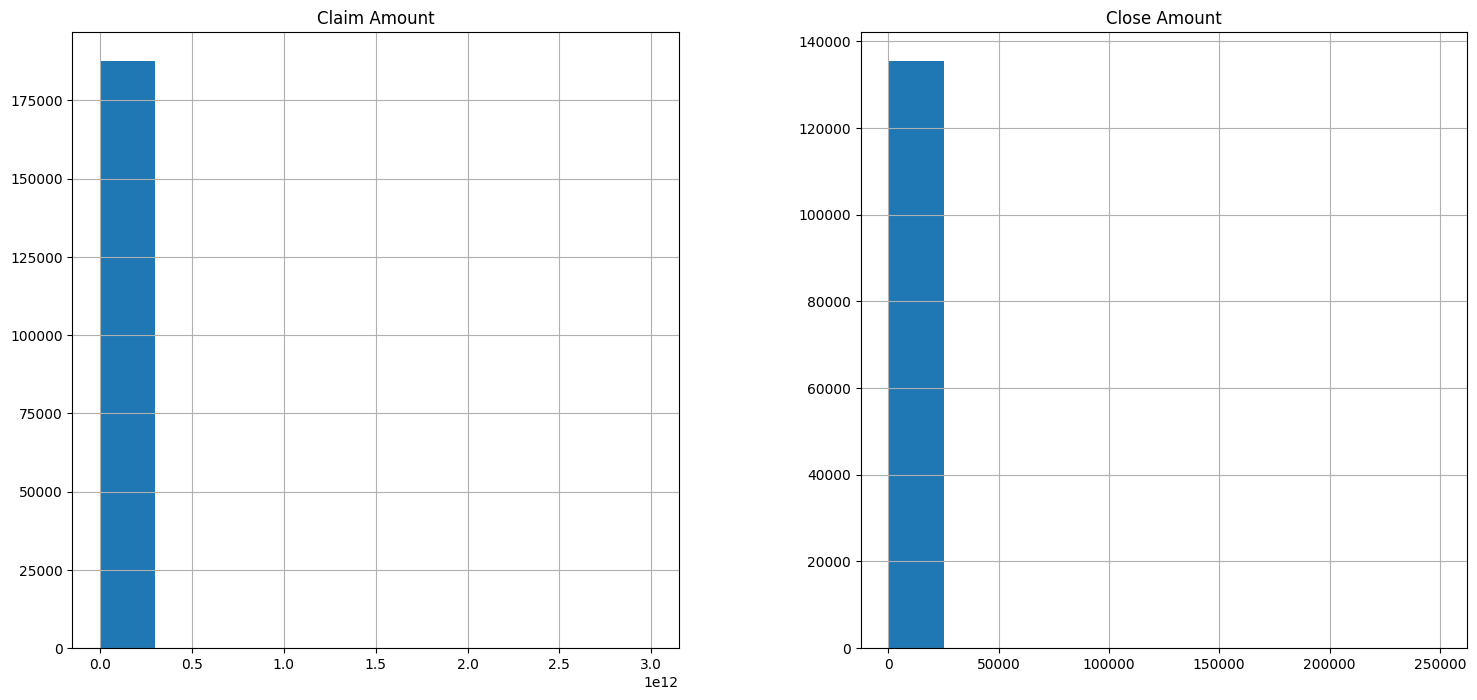

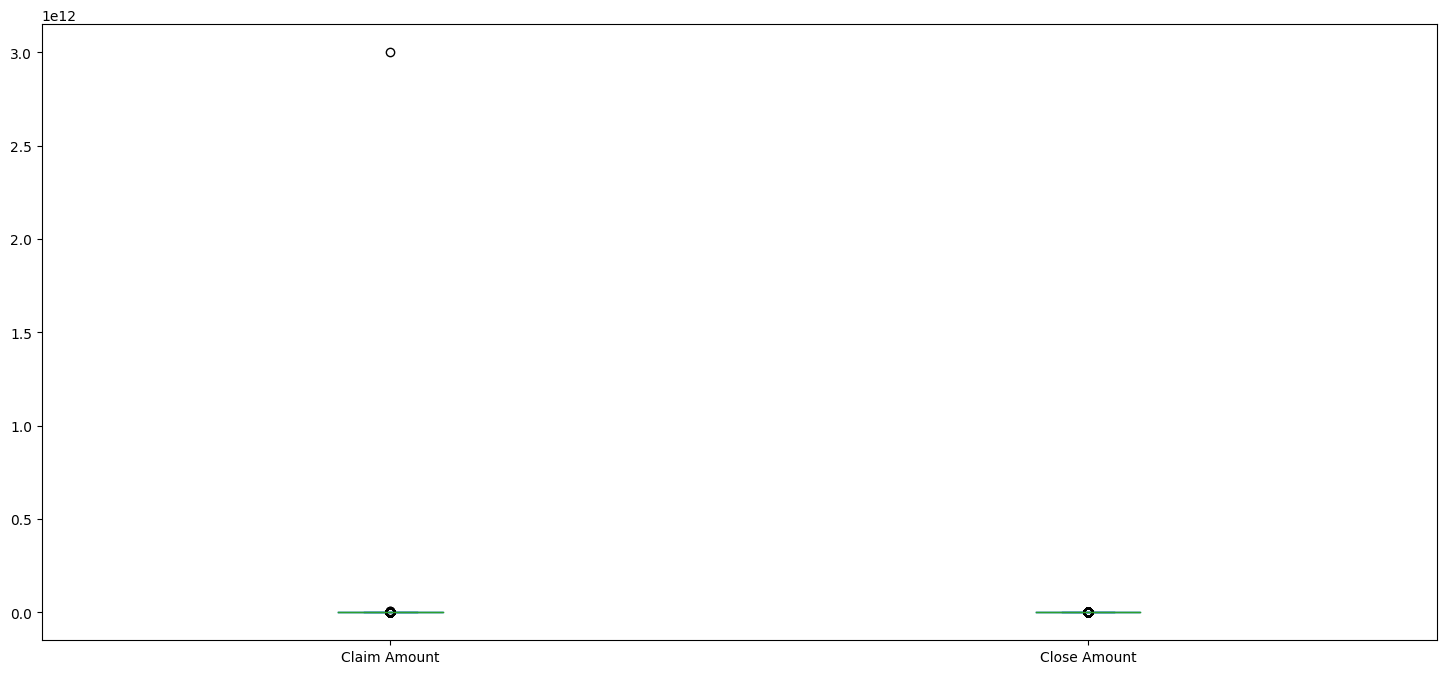

In [197]:
# melihat persebaran data dan juga potensi outlier
display(df.hist(figsize=(18,8)),df.plot(kind='box',figsize=(18,8)))

Secara garis besar, dapat disimpulkan bahwa:
- df dari data TSA Claims memiliki baris sebanyak **204267** dan kolom sebanyak **13**
- `Claim Amount` dan `Close Amount` memiliki hubungan yang erat berdasarkan deskripsi
- `Claim Amount` dan `Close Amount` memiliki bentuk histogram yang mirip, namun belum bisa dipastikan untuk normalitasnya, memerlukan pengujian lebih lanjut, namun Frekuensi keduanya menunjukkan banyak berkumpul di dekat angkat **0** 
- `Claim Amount` memiliki nilai outlier yang cukup ekstrim, akan memerlukan investigasi lebih dalam mengenai hal ini
- `Airport Code`, `Airport Name` dan `Airline Name` saling berkaitan karena merepresentasikan lokasi 
- `Airport Code` memiliki unique yang berbeda dengan `Airport Name`, walaupun Missing Value mereka sama, dan top dari keduanya tidak coock, dimana `Airport Code`nya adalah LAX (Los Angeles) dan `Airport Name`nya adalah John F Kennedy (JFK), Hal ini akan dibedah lebih detail nantinya
- `Claim Type`, `Claim Site` dan `Item` saling berkaitan karena mereperesentasikan detail dari Klaim itu sendiri
- `Claim Amount`, `Close Amount`, `Status` dan `Disposition` juga memiliki hubungan erat karena merepresentasikan proses dari klaim 
- `Date Received` dan `Incident Date` memiliki hubungan erat mewakilkan waktu klaim dan waktu insiden
- Hal yang cukup rumit untuk dibersihkan dari `Incident Date` karena menyangkut banyaknya format dalam 1 kolom

### Data Cleaning

#### Invalid Values

##### `Date Received` and `Incident Date`

Data ini masih dibilang *Invalid* karena masih dalam bentuk *Object*, selain itu `Incident Date` masih dalam bentuk beberapa format, oleh karena itu akan kita clean terlebih dahulu 

In [198]:
# Merubah ke Datetime
df['Date Received'] = pd.to_datetime(df['Date Received'])
# Cek data
df['Date Received'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 204267 entries, 0 to 204266
Series name: Date Received
Non-Null Count   Dtype         
--------------   -----         
204004 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


Hal ini bisa dilakukan langsung dengan `Date Received` karena hanya berbentuk dalam 1 format saja, sekarang kita akan lakukan pembersihan format pada `Incident Date` sebelum berubahnya ke *Datetime*

In [199]:
# Buat format pertama yang jelas terlihat di dataframe 
format = r'\d{1,2}\/\d{1,2}\/\d{4}\s\d{1,2}:\d{2}'
# Untuk menampung kita buat not_detected, akan melihakan not null & selain format (karena menggunakan ~)
not_detected = df[~df['Incident Date'].apply(lambda x: pd.isna(x) or bool(re.match(format, str(x))))][['Incident Date']]
not_detected

Incident Date
28862   03-SEP-0300 00:00
51558   10-OCT-0200 00:00
52196   05-DEC-0204 00:00
52637   20-MAR-0201 00:00
52918   25-SEP-0204 00:00
...                   ...
204262  16-Oct-15        
204263  2-Dec-15         
204264  20-Dec-15        
204265  28-Dec-15        
204266  23-Nov-15        

[17687 rows x 1 columns]

Terlihat bahwa format pertama sudah terpilih, maka akan saya simpan format tersebut, lalu selanjutnya bisa saya gunakan format kedua dimana pada table diatas terlihat jelas seperti contohnya '23-Nov-15', maka regexnya adalah **\d{1,2}-[A-Z][a-z]{2}-\d{2}**, maka saya akan tambahkan informasi diatas

In [200]:
# Tambahkan format kedua dengan '|' agar terbaca keduanya
format = r'\d{1,2}\/\d{1,2}\/\d{4}\s\d{1,2}:\d{2}|\d{1,2}-[A-Z][a-z]{2}-\d{2}'
# akan kita tampilkan lagi di not_detected
not_detected = df[~df['Incident Date'].apply(lambda x: pd.isna(x) or bool(re.match(format, str(x))))][['Incident Date']]
not_detected

Incident Date
28862   03-SEP-0300 00:00
51558   10-OCT-0200 00:00
52196   05-DEC-0204 00:00
52637   20-MAR-0201 00:00
52918   25-SEP-0204 00:00
...                   ...
138786  19-JUN-0209 00:00
139491  26-MAY-0201 00:00
139731  03-MAY-1008 00:00
141253  18-AUG-0200 00:00
151914  6/30/10          

[165 rows x 1 columns]

Terlihat bahwa data sudah terfilter cukup banyak dari 17000an jadi hanya tinggal 165, namun masih ada format yang bisa saya pakai yang tertinggal, yaitu '6/30/10' saya akan masukkan lagi dengan regex **\d{1,2}\/\d{2}\/\d{2}**, dan akan saya masukkan dan kita lihat hasilnya

In [201]:
# Tambahkan format ketiga dengan '|' agar terbaca keduanya
format = r'\d{1,2}\/\d{1,2}\/\d{4}\s\d{1,2}:\d{2}|\d{1,2}-[A-Z][a-z]{2}-\d{2}|\d{1,2}\/\d{2}\/\d{2}'
# akan kita tampilkan lagi di not_detected
not_detected = df[~df['Incident Date'].apply(lambda x: pd.isna(x) or bool(re.match(format, str(x))))][['Incident Date']]
not_detected

Incident Date
28862   03-SEP-0300 00:00
51558   10-OCT-0200 00:00
52196   05-DEC-0204 00:00
52637   20-MAR-0201 00:00
52918   25-SEP-0204 00:00
...                   ...
138597  15-JUN-0209 00:00
138786  19-JUN-0209 00:00
139491  26-MAY-0201 00:00
139731  03-MAY-1008 00:00
141253  18-AUG-0200 00:00

[164 rows x 1 columns]

Dari regex ketiga terlihat bahwa dia hanya ada pada 1 row, dan bisa dilihat bahwa row yang tersisa ada 164 row, dan yang terlihat saat ini adalah format yang cukup "aneh" karena tidak bisa didefinisikan, seperti contohnya 03-SEP-0300 00:00, ini menimbulkan kebingungan, apakah artinya 3 September 2003 00:00:00? ataukah 3 September 300 00:00 (dimana hal ini cukup absurd dimana datanya adalah tahun 300), oleh karena itu, format ini nantinya akan kita anggap sebagai NaT (Not a Time). Namun kita tetap harus mengambil regex dari format ini, karena ada kemungkinan tersembunyinya format lain, oleh karena itu kita akan ambil regexnya yaitu **\d{2}-[A-Z]{3}-\d{4}\s\d{2}:\d{2}**

In [202]:
# Tambahkan format keempat dengan '|' agar terbaca keduanya
format = r'\d{1,2}\/\d{1,2}\/\d{4}\s\d{1,2}:\d{2}|\d{1,2}-[A-Z][a-z]{2}-\d{2}|\d{1,2}\/\d{2}\/\d{2}|\d{2}-[A-Z]{3}-\d{4}\s\d{2}:\d{2}'
# akan kita tampilkan lagi di not_detected
not_detected = df[~df['Incident Date'].apply(lambda x: pd.isna(x) or bool(re.match(format, str(x))))][['Incident Date']]
not_detected

Empty DataFrame
Columns: [Incident Date]
Index: []

Sudah terlihat jelas bahwa tidak ada lagi pattern atau format lain selain 4 format diatas, dan sudah dijelaskan juga diatas dimana format keempat merupakan inputan tidak valid karena tidak merepresentasikan waktu tertentu.

Dengan format yang sudah didapat saya bisa menyimpulkan bahwa ada 3 format valid, yaitu:
 - %d-%b-%y       = contoh, 16-Oct-15
 - %m/%d/%y       = contoh, 6/30/10
 - %m/%d/%Y %H:%M = contoh, 11/26/2003 0:00

Dengan format yang ditemukan, saya bisa memulai untuk memasukkannya dan secara bersamaan akan merubahnya menjadi datetime dengan 'pd.to_datetime'

In [203]:
# Melakukan perubahan dengan pd.to_datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'],format='%d-%b-%y',errors='coerce') \
                .fillna(pd.to_datetime(df['Incident Date'],format='%m/%d/%y',errors='coerce')) \
                .fillna(pd.to_datetime(df['Incident Date'],format='%m/%d/%Y %H:%M',errors='coerce'))

In [204]:
# Cek perubahan dari kedua kolom
df[['Incident Date','Date Received']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Incident Date  201920 non-null  datetime64[ns]
 1   Date Received  204004 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


`Date Received` dan `Incident Date` sudah berhasil dirubah menjadi tipe datetime 

##### `Airport Code` 

Pengecekkan selanjutnya pada `Airport Code`, dimana saya akan melakukan test untuk penarikan value selain **3 Huruf Kapital** menggunakan regex

In [205]:
# Membuatkan pattern untuk regex
pattern = r'[A-Z]{3}'
# membuat variable invalid_code, lalu mengekstrak code yang salah dengan bantuan '~'
invalid_codes = df.loc[~(df['Airport Code'].isna() | df['Airport Code'].str.match(pattern)), 'Airport Code']
# kita ambil hasil invalidnya
invalid_codes.head()

2802    F
2889    F
3046    F
3506    F
3845    F
Name: Airport Code, dtype: object

Kita lihat ternyata setelah mencoba untuk mengekstrak value selain **3 Huruf Kapital**, ternyata terdapat value lain yang bentuknya diluar regex yang di tulis, maka akan saya cek untuk unique datanya

In [206]:
# Unique dari Invalid Code
invalid_codes.unique()

array(['F', 'I', 'C'], dtype=object)

Terlihat terdapat **'F','I' dan 'C'**, dimana bukan merupakan code 3 huruf, mari saya cek apa saja arti dari F, I dan C

In [207]:
# Melihat nama dari airport 
display(df[df['Airport Code'] == 'I'][['Airport Code','Airport Name']].head(1),df[df['Airport Code'] == 'F'][['Airport Code','Airport Name']].head(1),df[df['Airport Code'] == 'C'][['Airport Code','Airport Name']].head(1))

Airport Code                 Airport Name
27526  I            Insurance Subrogation Claim

Airport Code     Airport Name
2802  F            Foreign airport

Airport Code                            Airport Name
45774  C            Civil Aviation; Non TSA manned Airport

Dapat disimpulkan bahwa:
 - I = Insurance Subrogation Claim
 - F = Foreign airport
 - C = Civil Aviation; Non TSA manned Airport

Untuk membenarkan hal ini, saya akan mereplace Airport Code agar mempunyai format 3 Huruf Kapital, seperti:
 - I = ISC
 - F = FOR
 - C = CVA

In [208]:
# Mengganti I menjadi ISC
df['Airport Code'] = df['Airport Code'].replace('I', 'ISC')
# Mengganti F menjadi FOR
df['Airport Code'] = df['Airport Code'].replace('F', 'FOR')
# Mengganti C menjadi CVA
df['Airport Code'] = df['Airport Code'].replace('C', 'CVA')

In [209]:
# Memperlihatkan hasil
display(df[df['Airport Code'] == 'ISC'][['Airport Code','Airport Name']].head(2),df[df['Airport Code'] == 'FOR'][['Airport Code','Airport Name']].head(2),df[df['Airport Code'] == 'CVA'][['Airport Code','Airport Name']].head(2))

Airport Code                 Airport Name
27526  ISC          Insurance Subrogation Claim
27878  ISC          Insurance Subrogation Claim

Airport Code     Airport Name
2802  FOR          Foreign airport
2889  FOR          Foreign airport

Airport Code                            Airport Name
45774  CVA          Civil Aviation; Non TSA manned Airport
49122  CVA          Civil Aviation; Non TSA manned Airport

Sudah terlihat bahwa penulisan `Airport Code` sudah sesuai.

##### `Item`

Yang terakhir adalah perubahan dalam penamaan `Item`, disini jika kita perhatikan `Item` memiliki penamaan yang cukup panjang, seperti **'Jewelry - Fine', 'Clothing - Shoes; belts; accessories; etc.;'**, Namun kalau dilihat dari kata pertama dan kedua, sudah cukup merepresentasikan barang detail tersebut

Jadi langkah yang cukup masuk akal untuk mengubah semua namanya dengan menggunakan kata pertama

In [210]:
# Memisahkan kalimat pertama ke dua kolom (karena ada yang 1 kata ada yang 2 kata dipisah dengan spasi)
df[['item_depan', 'item_belakang']] = df['Item'].str.extract(r'^(\w+)(?:\s+(\w+))?')
# Memassukkan kedalam kolom Item 
df['Item'] = df[['item_depan', 'item_belakang']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1) # Menggunakan fungsi Lambda dan Join
# Drop kolom pemisah
df = df.drop(['item_depan', 'item_belakang'],axis=1)

In [211]:
# Cek Hasil
df.head()

Claim Number Date Received Incident Date Airport Code  \
0  0909802M      2002-01-04    2002-12-12     EWR           
1  0202417M      2002-02-02    2004-01-16     SEA           
2  0202445M      2002-02-04    2003-11-26     STL           
3  0909816M      2002-02-07    2003-01-06     MIA           
4  2005032379513 2002-02-18    2005-02-05     MCO           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     NaN                   Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   
3  Miami International Airport      American Airlines     Property Damage   
4  Orlando International Airport    Delta (Song)          Property Damage   

        Claim Site         Item  Claim Amount    Status  Close Amount  \
0  Checkpoint       Other       350.00         Approved 350.00          
1  Checked Baggage  Luggage     100.00         Settled  50.00           
2  Checked Baggage  Cell Phones 278.88         Settled  227.92          
3  Checkpoint       Luggage     50.00          Approved 50.00           
4  Checkpoint       Baby        84.79          Approved 84.79           

       Disposition  
0  Approve in Full  
1  Settle           
2  Settle           
3  Approve in Full  
4  Approve in Full

Dapat terlihat `Item` sudah merepresentasikan hal ini dengan baik, dimana diambil kalimat pertama

In [212]:
# Cek NaN
df[df['Item'].isna()]

Empty DataFrame
Columns: [Claim Number, Date Received, Incident Date, Airport Code, Airport Name, Airline Name, Claim Type, Claim Site, Item, Claim Amount, Status, Close Amount, Disposition]
Index: []

Namun terlihat bahwa seluruh *NaN* value telah berubah menjadi kosong (Blank), maka saya akan kembalikan NaN value tersebut

In [213]:
# Replace '' dengan NaN
df['Item'].replace('', np.nan, inplace=True)
# Cek NaN kembali
print('NaN value pada kolom Item adalah: {}'.format(df['Item'].isna().sum()))


NaN value pada kolom Item adalah: 8389


Pembersihan pada `Item` Sudah cukup baik

Kita cek kelengkapan data

In [214]:
print('Kelengkapan Data:\nJumlah Baris "{}"\nJumlah Kolom "{}"'.format(df.shape[0],df.shape[1]))

Kelengkapan Data:
Jumlah Baris "204267"
Jumlah Kolom "13"


Terlihat bahwa belum ada penanganan missing value ataupun outlier

Selanjutnya kita akan menangani *Missing Value*

#### Missing Value

In [215]:
# Persentase missing value
df.isna().sum()/df.shape[0]*100

Claim Number    0.00 
Date Received   0.13 
Incident Date   1.15 
Airport Code    4.39 
Airport Name    4.39 
Airline Name    18.91
Claim Type      4.01 
Claim Site      0.50 
Item            4.11 
Claim Amount    8.22 
Status          6.25 
Close Amount    33.76
Disposition     35.69
dtype: float64

<Axes: >

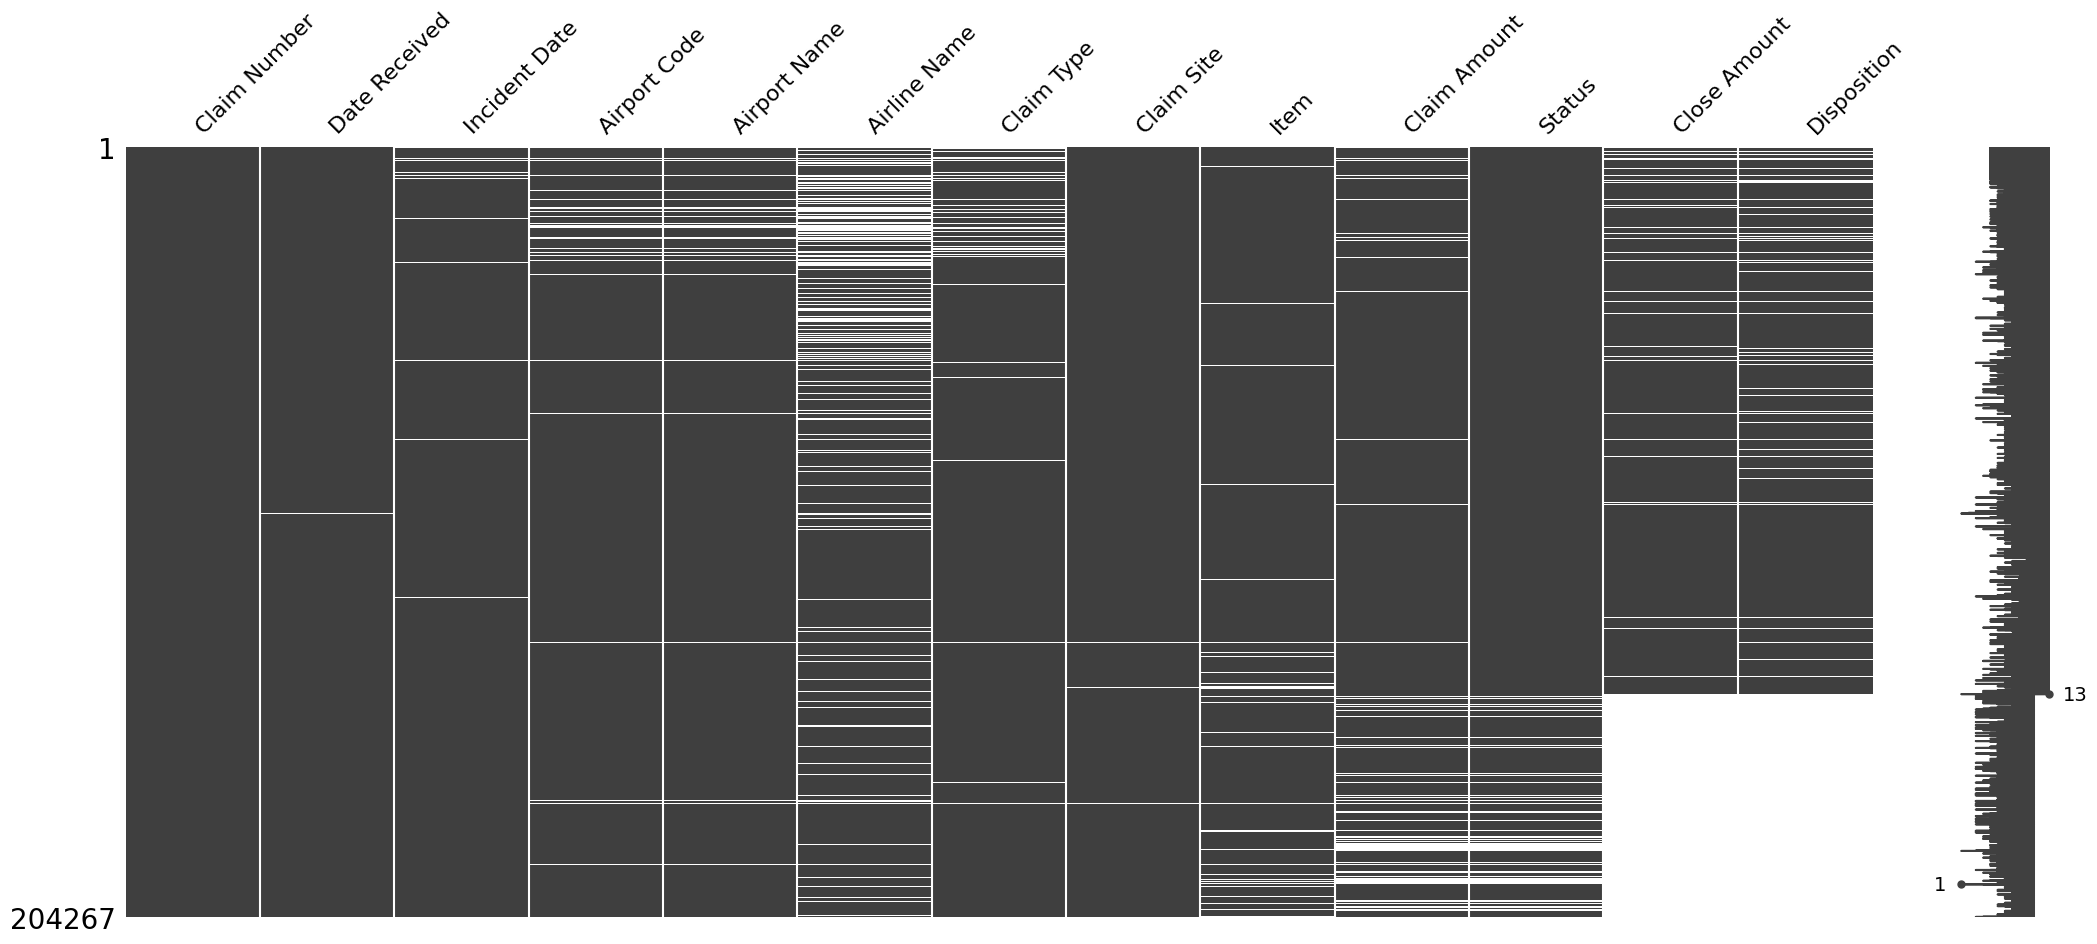

In [216]:
# buat matrix untuk melihat hubungan
msno.matrix(df)

Berdasarkan gambaran diatas:

- kolom-kolom seperti `Airline Name`, `Claim Amount`, `Status`, `Close Amount` dan `Disposition` memiliki nilai *missing value* yang cukup tinggi dengan nilai lebih dari **5%**
- `Incident Date` terlihat memiliki *missing value* yang sifatnya **MCAR** *(Missing Completely at Random)*
- `Airport Code` dan `Airport Name` memiliki *missing value* yang identik, jadi setiap adanya kekosongan pada `Airport Code` begitu juga akan terjadi pada `Airport Name`
- `Airport Code` dan `Airport Name` memiliki hubungan dengan `Airline Name` dapat dilihat bahwa kekosongan yang lebih tebal ada di bagian atas, sama halnya dengan `Airport Code` dan `Airport Name`
- `Airport Code` dan `Airport Name` juga memiliki hubungan dengan `Claim Type` banyak kekosongan dari `Airport Name` yang menghasilkan `Claim Type` yang kosong, mungkin ini dapat dijelaskan bahwa suatu tipe klaim cenderung sering terjadi pada beberapa airport secara repetitif. Dan juga hal ini membuat `Claim Type` dapat membantu mengisikan kekosongan di `Airport Name`
- `Claim Type` dan `Item` memiliki *missing value* yang berkebalikkan, dimana banyak `Claim Type` kosong yang diisi `Item` dan sebaliknya, namun secara *domain knowledge* bahwa **tipe klaim** akan bergantung kepada **barang** apa yang diajukan klaimnya, hal ini sangat membantu, dengan melakukan pengisian satu sama lain, dan juga bisa disupport dengan `Claim Site`
- `Claim Amount` dan `Status` juga memiliki hubungan erat, dimana kekosongan pada `Claim Amount` ada kemungkinan `Status`nya juga kosong
- `Close Amount` dan `Disposition` juga sangat erat, dimana kekosongan yang cukup banyak berada pada bagian bawah dan memiliki hubungan erat
- pengisian *missing value* dari `Claim Amount` juga secara *Domain Knowledge* dapat di bantu dengan `Item` yang dapat dijelaskan bahwa barang-barang tertentu pastinya punya nilai yang lebih tinggi dibanding yang lainnya seperti **perhiasan, sparepart mobil, komputer/laptop dan lain-lain** dengan ini pengisian `Claim Amount` juga dapat di bantu berdasarkan `Item`

##### `Claim Type`, `Claim Site`, dan `Item`

`Claim Type`

Secara domain knowledge `Claim Type` memiliki hubungan yang cukup erat dengan `Item`, karena `Claim Type` akan berdasarkan dari `Item` yang akan di ajukan klaim, dan juga sebaliknya, dimana `Item` akan mengikuti persoalan yang di klaim, selain itu `Claim Site` juga memiliki hubungan erat dengan Claim Type karena mewakili tempat claim berdasarkan Claim Type

In [217]:
# Total missing value awal & Persentasenya
print('Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()))
print('Persentase Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Type: 8195
Persentase Missing Value dari Claim Type: 4.0119059857931045


Pertama akan dilakukan pengisian `Claim Type` berdasarkan modusnya di tiap `Item`, hal ini dilakukan agar lebih akurat, karena saya mengambil modus `Claim Type` dari tiap `item`

In [218]:
# membuat grouping and aggregate modus, dimana jika modus > 1 maka akan di kembalikan sebagai NaN 
mode_by_item = df.groupby('Item')['Claim Type'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Claim Type'] = df['Claim Type'].fillna(df['Item'].map(mode_by_item))

In [219]:
# Total missing value & Persentasenya
print('Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()))
print('Persentase Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Type: 588
Persentase Missing Value dari Claim Type: 0.287858538089853


Terjadi perubahan sekitar 7400 data, setelah ini, pengisian selanjutkan bisa dilakukan berdasarkan `Airport Name` dimana relasinya cukup kuat menurut *matrix* diatas, dengan *domain knowledge* bahwa beberapa `Claim Type` cenderung terjadi pada suatu airport

In [220]:
# membuat grouping and aggregate modus
mode_by_airportname = df.groupby('Airport Name')['Claim Type'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Claim Type'] = df['Claim Type'].fillna(df['Airport Name'].map(mode_by_airportname))

In [221]:
# Total missing value & Persentasenya
print('Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()))
print('Persentase Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Type: 275
Persentase Missing Value dari Claim Type: 0.1346277176440639


Dengan sisa missing value sebesar 275 dan persentasenya 0.13% dengan ini melakukan penghapusan data merupakan hal yang tepat karena tidak banyak hal yang bisa kita lakukan lagi

In [222]:
# Drop di Claim Amount
df.dropna(subset=['Claim Type'], inplace=True)

In [223]:
# Total missing value & Persentasenya
print('Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()))
print('Persentase Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Type: 0
Persentase Missing Value dari Claim Type: 0.0


Dengan ini `Claim Type` sudah tidak memiliki *Missing Value*

`Item`

Pengisian `Item` bisa dilakukan sebaliknya, yaitu dengan menggunakan `Claim Type` dimana hal ini sudah disampaikan sebelumnya bahwa keduanya bisa saling mengisi kekosongan

In [224]:
# Cek missing value dan persentasenya
print('Missing Value dari Item: {}'.format(df['Item'].isna().sum()))
print('Persentase Missing Value dari Item: {}'.format(df['Item'].isna().sum()/df.shape[0]*100))

Missing Value dari Item: 8114
Persentase Missing Value dari Item: 3.977606964979019


In [225]:
# membuat grouping and aggregate modus
mode_by_claimtype = df.groupby('Claim Type')['Item'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Item'] = df['Item'].fillna(df['Claim Type'].map(mode_by_claimtype))

In [226]:
# Cek missing value dan persentasenya
print('Missing Value dari Item: {}'.format(df['Item'].isnull().sum()))
print('Persentase Missing Value dari Item: {}'.format(df['Item'].isna().sum()/df.shape[0]*100))

Missing Value dari Item: 3
Persentase Missing Value dari Item: 0.0014706459076826543


Setelah pengisian `Item` dari `Claim Type` masih tersisa 3 data, mari kita cek data tersebut

In [227]:
df[df['Item'].isna()]

Claim Number Date Received Incident Date Airport Code  \
193419  2014100117274 2014-10-01    2014-09-17     NaN           
194318  2014110318188 2014-10-27    2014-06-10     MMH           
194321  2014110318191 2014-10-30    2014-08-29     BFL           

                              Airport Name       Airline Name  Claim Type  \
193419  NaN                                 Delta Air Lines    Compliment   
194318  Mammoth Lakes                       Alaska Airlines    Compliment   
194321  Meadows Field; Bakersfield Airport  USAir              Compliment   

             Claim Site  Item  Claim Amount Status  Close Amount Disposition  
193419  Checked Baggage  None NaN            NaN   NaN            NaN         
194318  Checkpoint       None NaN            NaN   NaN            NaN         
194321  Checkpoint       None NaN            NaN   NaN            NaN

Data yang menunjukkan none itu artinya memiliki modus lebih dari 1 karena menggunakan syntax 
```python
.agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
```
Namun hal ini sama saja seperti *NaN* yang bisa terdeteksi dengan menggunakan 
```python 
.isna()
```

3 Data yang tersisa tidak bisa banyak kita ubah, oleh karena itu mempertimbangkan persentasenya yang dibawah **0.01**, data ini aman untuk dihapus

In [228]:
# Drop di Item
df.dropna(subset=['Item'], inplace=True)

In [229]:
# Cek missing value dan persentasenya
print('Missing Value dari Item: {}'.format(df['Item'].isnull().sum()))
print('Persentase Missing Value dari Item: {}'.format(df['Item'].isna().sum()/df.shape[0]*100))

Missing Value dari Item: 0
Persentase Missing Value dari Item: 0.0


Sekarang `Item` sudah tidak memiliki *missing value*

`Claim Site` 

Imputasi data `Claim Site` juga akan diisi dengan `Claim Type` karena secara *domain knowledge*, karena tempat klaim akan bergantung pada tipe klaim, dimana contohnya klaim barang hilang pada tempat barang, bukan pada 

In [230]:
# Missing value dari Claim Site
print('Missing Value dari Claim Site: {}'.format(df['Claim Site'].isna().sum()))
print('Persentase Missing Value Claim Site: {}'.format(df['Claim Site'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Site: 766
Persentase Missing Value Claim Site: 0.37551044419061813


Persentase dari `Claim Site` sudah cukup rendah, sekitar 0.37, namun, sebisa mungkin disini saya tidak akan menghapusnya, namun saya akan imputasi dengan `Claim Type`

In [231]:
# membuat grouping and aggregate modus
mode_by_claimtype = df.groupby('Claim Type')['Claim Site'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Claim Site'] = df['Claim Site'].fillna(df['Claim Type'].map(mode_by_claimtype))

In [232]:
# Missing value dari Claim Site
print('Missing Value dari Claim Site: {}'.format(df['Claim Site'].isna().sum()))
print('Persentase Missing Value Claim Site: {}'.format(df['Claim Site'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Site: 0
Persentase Missing Value Claim Site: 0.0


Setelah pengimputasi, `Claim Site` tidak lagi memiliki *missing Value*

In [233]:
# jumlah missing value
print(df[['Claim Type','Claim Site','Item']].isna().sum())
# persentase missing value 
print('\nPersentase Missing Value dari Claim Type: {}'.format(df['Claim Type'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value dari Item: {}'.format(df['Item'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Claim Site: {}'.format(df['Claim Site'].isna().sum()/df.shape[0]*100))

Claim Type    0
Claim Site    0
Item          0
dtype: int64

Persentase Missing Value dari Claim Type: 0.0
Persentase Missing Value dari Item: 0.0
Persentase Missing Value Claim Site: 0.0


Sudah tidak ada lagi *missing value* pada `Claim Type`, `Claim Site` dan `Item`

##### `Airport Name`, `Airport Code`, dan `Airline Name`

`Airport Name` dan `Airport Code` memiliki value dan juga *missing value* yang sama, dikarenakan `Airport Code` merupakan code singkatan dari `Airport Name`. dan `Airline Name` bisa diisi menggunakan `Airport Name/Code`, hal pertama yang dapat dilakukan adalah pengisian `Airport Name` dan Code berdasarkan modus dari `Claim Type`, hal ini berdasarkan bahwa `Claim Type` bisa merepresentasikan kejadian apa yang sering terjadi pada airport tertentu

In [234]:
# Total missing value 
print('Missing Value dari Airport Name: {}'.format(df['Airport Name'].isna().sum()))
print('Missing Value dari Airport Code: {}'.format(df['Airport Code'].isna().sum()))
print('Missing Value dari Airline Name: {}'.format(df['Airline Name'].isna().sum()))
# Persentase missing value
print('\nPersentase Missing Value Airport Name: {}'.format(df['Airport Name'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airport Code: {}'.format(df['Airport Code'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airline Name: {}'.format(df['Airline Name'].isna().sum()/df.shape[0]*100))

Missing Value dari Airport Name: 8689
Missing Value dari Airport Code: 8689
Missing Value dari Airline Name: 38366

Persentase Missing Value Airport Name: 4.259543406752324
Persentase Missing Value Airport Code: 4.259543406752324
Persentase Missing Value Airline Name: 18.807876895322785


In [235]:
# membuat grouping and aggregate modus
mode_by_claimtype = df.groupby('Claim Type')['Airport Name'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Airport Name'] = df['Airport Name'].fillna(df['Claim Type'].map(mode_by_claimtype))

Pengisian pertama dengan mengisi `Airport Name` dengan `Claim Type`

lalu `Airport Code` dengan `Airport Name`

In [236]:
# membuat grouping and aggregate modus
mode_by_airportname = df.groupby('Airport Name')['Airport Code'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Airport Code'] = df['Airport Code'].fillna(df['Airport Name'].map(mode_by_airportname))

Dan `Airline Name` dengan `Airport Name`

In [237]:
# membuat grouping and aggregate modus
mode_by_airportname = df.groupby('Airport Name')['Airline Name'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) == 1 else None)
# memasukkan aggregate dari grouping dengan fillna dan map
df['Airline Name'] = df['Airline Name'].fillna(df['Airport Name'].map(mode_by_airportname))

In [238]:
# Total missing value 
print('Missing Value dari Airport Name: {}'.format(df['Airport Name'].isna().sum()))
print('Missing Value dari Airport Code: {}'.format(df['Airport Code'].isna().sum()))
print('Missing Value dari Airline Name: {}'.format(df['Airline Name'].isna().sum()))
# Persentase missing value
print('\nPersentase Missing Value Airport Name: {}'.format(df['Airport Name'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airport Code: {}'.format(df['Airport Code'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airline Name: {}'.format(df['Airline Name'].isna().sum()/df.shape[0]*100))

Missing Value dari Airport Name: 37
Missing Value dari Airport Code: 37
Missing Value dari Airline Name: 524

Persentase Missing Value Airport Name: 0.01813823294393325
Persentase Missing Value Airport Code: 0.01813823294393325
Persentase Missing Value Airline Name: 0.25687659628705467


Terlihat masing2 *Missing Value* memiliki nilai dibawah 1% untuk `Airline Name` dan `Airport Code`. Sedangkan `Airport Name` memiliki missing value dibawah 0.1%, bisa di asumsikan data ini aman untuk dihapus

In [239]:
# Drop Missing Value dari Airport Name, Code dan Airline Name
df.dropna(subset='Airport Name',inplace=True)
df.dropna(subset='Airport Code',inplace=True)
df.dropna(subset='Airline Name',inplace=True)
df.reset_index(drop=True,inplace=True)

In [240]:
# Cek Sisa Missing Value
print(df[['Airport Code','Airport Name','Airline Name']].isna().sum())
# Persentase Missing value
print('\nPersentase Missing Value Airport Name: {}'.format(df['Airport Name'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airport Code: {}'.format(df['Airport Code'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Airline Name: {}'.format(df['Airline Name'].isna().sum()/df.shape[0]*100))

Airport Code    0
Airport Name    0
Airline Name    0
dtype: int64

Persentase Missing Value Airport Name: 0.0
Persentase Missing Value Airport Code: 0.0
Persentase Missing Value Airline Name: 0.0


Sudah tidak ada lagi *missing value* pada `Airport Name`, `Airport Code` dan `Airline Name`

##### `Date Received` and `Incident Date`

In [241]:
# Total missing value 
print('Missing Value dari Date Received: {}'.format(df['Date Received'].isna().sum()))
print('Missing Value dari Incident Date: {}'.format(df['Incident Date'].isna().sum()))

# Persentase Missing value
print('\nPersentase Missing Value Date Received: {}'.format(df['Date Received'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Incident Date: {}'.format(df['Incident Date'].isna().sum()/df.shape[0]*100))

Missing Value dari Date Received: 145
Missing Value dari Incident Date: 2178

Persentase Missing Value Date Received: 0.07126742980158166
Persentase Missing Value Incident Date: 1.0704859455713436


Sebelum menangani *missing value*, ada hal yang harus di cek mengenai data `Incident Date` dan `Date Received`, dimana jika ada tahun yang terlalu tinggi, maka perlu di hilangkan, menurut [kaggle](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database), data ini terakhir berada pada 2015, maka kita akan mulai menghilangkan data dari 2015 keatas

In [242]:
# Cek tahun diatas 2015
df[(df['Date Received'].dt.year > 2015)].head(5)

Claim Number Date Received Incident Date Airport Code  \
96533  2006051105953 2020-05-08    2006-04-04     JFK           
96534  2005051985068 2025-05-17    2005-04-18     MCO           
96535  2005060785897 2025-05-31    2005-05-06     OAK           
96536  2005090792253 2025-05-31    2005-07-26     LAX           
96537  2005081290465 2025-08-02    2005-07-20     SAN           

                             Airport Name        Airline Name  \
96533  John F. Kennedy International       Jet Blue             
96534  Orlando International Airport       AirTran Airlines     
96535  Metropolitan Oakland International  Southwest Airlines   
96536  Los Angeles International Airport   UAL                  
96537  San Diego International             Jet Blue             

                    Claim Type       Claim Site                 Item  \
96533  Property Damage          Checked Baggage  Clocks                
96534  Property Damage          Checked Baggage  Musical Instruments   
96535  Property Damage          Checked Baggage  Luggage               
96536  Property Damage          Checked Baggage  Locks                 
96537  Passenger Property Loss  Checked Baggage  Photographic Film     

       Claim Amount    Status  Close Amount      Disposition  
96533 637.76         Settled  179.08         Settle           
96534 100.00         Approved 100.00         Approve in Full  
96535 65.00          Denied   0.00           Deny             
96536 250.00         Denied   0.00           Deny             
96537 32.14          Canceled 0.00           NaN

Terlihat banyak tahun yang sangat jauh seperti **2025**, maka akan kita hilangkan

In [243]:
# mulai dari tahun 2015 (kita include juga NaT data)
df = df[(df['Date Received'].dt.year <= 2015)|(df['Date Received'].isna())]

Data sudah di transform, sekarang untuk `Incident Date`

In [244]:
# cek untuk Incident Date
df[df['Incident Date'].dt.year > 2015]

Empty DataFrame
Columns: [Claim Number, Date Received, Incident Date, Airport Code, Airport Name, Airline Name, Claim Type, Claim Site, Item, Claim Amount, Status, Close Amount, Disposition]
Index: []

Terlihat bahwa `Incident Date` tidak memiliki tahun yang lebih dari 2015, sekarang kita akan update *missing value*

In [245]:
# cek untuk Incident Date
df = df[(df['Incident Date'].dt.year >= 2002)|(df['Incident Date'].isna())]

Selain itu, perlu ada pengecekan apakah ada `Date Received` lebih kecil (lebih dulu) dari `Incident Date`, jika ada maka perlu dilakukan penukaran/transformasi

In [246]:
# Cek dimana date received lebih dulu 
print('Waktu klaim diterima lebih dulu dari waktu insiden: {}'.format(df[df['Date Received']<df['Incident Date']].shape[0]))

Waktu klaim diterima lebih dulu dari waktu insiden: 1700


Ternyata setelah memeriksa, ada sekitar 1700an data dimana waktu klaimnya lebih dulu, dalam hal ini cukup tidak masuk akal, bagaimana bisa klaim diajukan sebelum adanya kejadian, oleh karena itu pendekatan yang terbaik adalah menukarkan waktu klaim dengan waktu insiden

In [247]:
# Iterasi dari df 
for index, row in df.iterrows():
    # Dimana date received < incident date
    if row['Date Received'] < row['Incident Date']:
        # jika ya, simpan date received di variable temporary
        temp = row['Date Received']
        # masukkan incident date kedalam date received
        df.at[index, 'Date Received'] = row['Incident Date']
        # masukkan temporary kedalam incident date
        df.at[index, 'Incident Date'] = temp

In [248]:
# Cek dimana date received lebih dulu 
print('Waktu klaim diterima lebih dulu dari waktu insiden: {}'.format(df[df['Date Received']<df['Incident Date']].shape[0]))

Waktu klaim diterima lebih dulu dari waktu insiden: 0


Terlihat sudah tidak ada lagi waktu yang tertukar, sekarang kita lanjut membahas *missing value*

In [249]:
# Total missing value 
print('Missing Value dari Date Received: {}'.format(df['Date Received'].isna().sum()))
print('Missing Value dari Incident Date: {}'.format(df['Incident Date'].isna().sum()))

# Persentase Missing value
print('\nPersentase Missing Value Date Received: {}'.format(df['Date Received'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Incident Date: {}'.format(df['Incident Date'].isna().sum()/df.shape[0]*100))

Missing Value dari Date Received: 145
Missing Value dari Incident Date: 2178

Persentase Missing Value Date Received: 0.07128074289281834
Persentase Missing Value Incident Date: 1.0706859173831609


Terlihat penghilangan tahun diatas tidak berpengaruh kepada *missing value*, oleh karena itu dengan `Date Received` dibawah 0.1% dan `Incident Date` di angka 1%, maka data bisa dibilang masih aman untuk dihapus, karena itu merupakan cara yang dibilang cukup baik untuk kondisi seperti ini, maka data akan dihapus

In [250]:
# drop Incident date dan Date Received
df.dropna(subset='Date Received',inplace=True)
df.dropna(subset='Incident Date',inplace=True)

In [251]:
# Total missing value 
print('Missing Value dari Date Received: {}'.format(df['Date Received'].isna().sum()))
print('Missing Value dari Incident Date: {}'.format(df['Incident Date'].isna().sum()))

# Persentase Missing value
print('\nPersentase Missing Value Date Received: {}'.format(df['Date Received'].isna().sum()/df.shape[0]*100))
print('Persentase Missing Value Incident Date: {}'.format(df['Incident Date'].isna().sum()/df.shape[0]*100))

Missing Value dari Date Received: 0
Missing Value dari Incident Date: 0

Persentase Missing Value Date Received: 0.0
Persentase Missing Value Incident Date: 0.0


Setelah data sudah terhapus, maka `Incident Date` dan `Date Received` sudah tidak memiliki *missing value*

##### `Claim Amount`

Untuk menangani *missing value* pada `Claim Amount` bisa dilakukan dengan melihat apakah ada nilai pada `Close Amount` di `Claim Amount` yang missing, dan perlu di perhatikan juga untuk `Disposition`nya yang akan menentukan apakah imputasi `Claim Amount` secara penuh atau ada yang harus di kalkulasikan dulu

In [252]:
# Total missing value 
print('Missing Value dari Claim Amount: {}'.format(df['Claim Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Claim Amount: {}'.format(df['Claim Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Amount: 15141

Persentase Missing Value Claim Amount: 7.528453586718179


In [253]:
# Cek Claim Amount NaN & Close amount > 0
print('Total Claim Amount yang Nan, tapi Close Amount > 0:\n{}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)].shape[0]))

Total Claim Amount yang Nan, tapi Close Amount > 0:
156


Terdapat 156 baris dimana `Claim Amount` bisa diisi dengan `Close Amount`, mengapa menggunakan **> 0**, mengapa tidak menggunakan
```python
.notna()
```
Karena, jika `Close Amount` 0, dan `Claim Amount` NaN, mengartikan, adanya ajuan klaim, namun klaim tersebut ditolak, dengan itu pengisian `Claim Amount` NaN dengan 0 dinilai kurang tepat

Hal yang perlu diperhatikan sekarang adalah:
1. Pengimputasi `Close Amount` kedalam `Claim Amount` bisa dilakukan dengan memasukkan nilai dari `Close Amount` itu sendiri, **JIKA** `Disposition`nya adalah **Approve in Full** ataupun **Deny**
2. Jika `Disposition`nya adalah **Settle** maka diperlukan ratio dari `Close Amount`/`Claim Amount` dari data yang sudah ada

In [254]:
# print total masing2 disposition
print('Disposition Approve: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Approve in Full')].shape[0]))
print('Disposition Settle: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Settle')].shape[0]))
print('Disposition Deny: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Deny')].shape[0]))

# Jumlah 
print('\nJumlah : {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Approve in Full')].shape[0] + 
                        df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Settle')].shape[0] + 
                        df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Deny')].shape[0]))

Disposition Approve: 64
Disposition Settle: 89
Disposition Deny: 2

Jumlah : 155


Masih tersisa 1 dari kondisi Total `Claim Amount` yang Nan, tapi `Close Amount` > 0, yang memungkinkan bahwa tidak ada `Disposition` pada 1 baris tersebut.

Untuk langkah pertama, kita kan mengimputasi yang `Disposition`nya adalah **Settle**

In [255]:
# Cari rationya terlebih dahulu
print('Rata-rata ratio dari Close Amount/Claim Amount adalah: \n{}'.format((df[(df['Disposition']=='Settle')&(df['Claim Amount']>0)&(df['Close Amount']>=0)]['Close Amount']/df[(df['Disposition']=='Settle')&(df['Claim Amount']>0)&(df['Close Amount']>=0)]['Claim Amount']*100).mean()))

Rata-rata ratio dari Close Amount/Claim Amount adalah: 
51.54554919371605


Ratio yang di dapatkan adalah 51.5% bisa kita bulatkan jadi 50%, sekarang kita akan isi NaN `Claim Amount` dengan `Disposition` Settle

In [256]:
# dengan .loc untuk mendapatkan lokasi row
df.loc[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Settle'), 'Claim Amount'] = df['Close Amount']*2
# menggunakan df['Close Amount']*2, karena ratio yang kita ambil 50%, artinya Claim Amount dua kali Close Amount

In [257]:
# imputasi dengan disposition 'Approve in Full'
df.loc[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Approve in Full'), 'Claim Amount'] = df['Close Amount']

In [258]:
# imputasi dengan disposition 'Deny'
df.loc[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Deny'), 'Claim Amount'] = df['Close Amount']

Imputasi sudah selesai dilakukan, dimana Approve & deny tidak memerlukan kalkulasi lebih, karena tidak ada ratio yang berbeda dengan settle, dimana kondisi `Close Amount` pasti dibawah `Claim Amount` namun tidaklah 0

In [259]:
# print total masing2 disposition
print('Disposition Approve: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Approve in Full')].shape[0]))
print('Disposition Settle: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Settle')].shape[0]))
print('Disposition Deny: {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Deny')].shape[0]))

# Jumlah 
print('\nJumlah : {}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Approve in Full')].shape[0] + 
                        df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Settle')].shape[0] + 
                        df[(df['Claim Amount'].isna())&(df['Close Amount']>0)&(df['Disposition']=='Deny')].shape[0]))

Disposition Approve: 0
Disposition Settle: 0
Disposition Deny: 0

Jumlah : 0


Sudah tidak ada lagi berdasarkan `Disposition`nya

In [260]:
# Cek Claim Amount NaN & Close amount > 0
print('Total Claim Amount yang Nan, tapi Close Amount > 0:\n{}'.format(df[(df['Claim Amount'].isna())&(df['Close Amount']>0)].shape[0]))

Total Claim Amount yang Nan, tapi Close Amount > 0:
1


Dan ternyata masih tersisa 1, mari kita cek

In [261]:
df[(df['Claim Amount'].isna())&(df['Close Amount']>0)]

Claim Number Date Received Incident Date Airport Code  \
19717  1107210M    2003-11-07    2003-10-01     ORD           

                               Airport Name Airline Name       Claim Type  \
19717  Chicago O'Hare International Airport  UAL          Property Damage   

            Claim Site     Item  Claim Amount    Status  Close Amount  \
19717  Checked Baggage  Luggage NaN            Canceled 50.00           

      Disposition  
19717  NaN

Ternyata missing value dari `Claim Amount` ini juga memiliki missing value pada `Disposition`, oleh karena itu akan kita biarkan saja dulu, karena selanjutnya kita akan cek *missing value* pada `Claim Amount` secara keseluruhan 

`Claim Amount` secara *domain knowledge* berhubungan dengan `Item`, dimana `Item` memiliki variasi barang yang bisa dikategorikan memiliki harga-harga yang mirip, misalnya harga laptop atau harga perhiasan, dengan ini, kita akan imputasi `Claim Amount` berdasarkan `Item`

In [262]:
# Total missing value 
print('Missing Value dari Claim Amount: {}'.format(df['Claim Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Claim Amount: {}'.format(df['Claim Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Amount: 14986

Persentase Missing Value Claim Amount: 7.451384020246921


*Missing value* pada `Claim Amount` cukup tinggi yaitu 7.4%, dengan itu tentunya penghapusan langsung bukanlah cara yang utama, kita akan melakukan pendekatan imputasi berdasarkan `Item` namun untuk imputasi `Claim Amount` berikut beberapa hal yang harus di perhatikan:
1. Normality `Claim Amount` per `Item`
2. Sampel jika groupby `Item`

Hal ini perlu diperhatikan karena dalam pengimputasi data, normalitas sangat berpengaruh terhadap apa yang akan kita Imputasi nantinya. berikut kumpulan histogram per `Item`

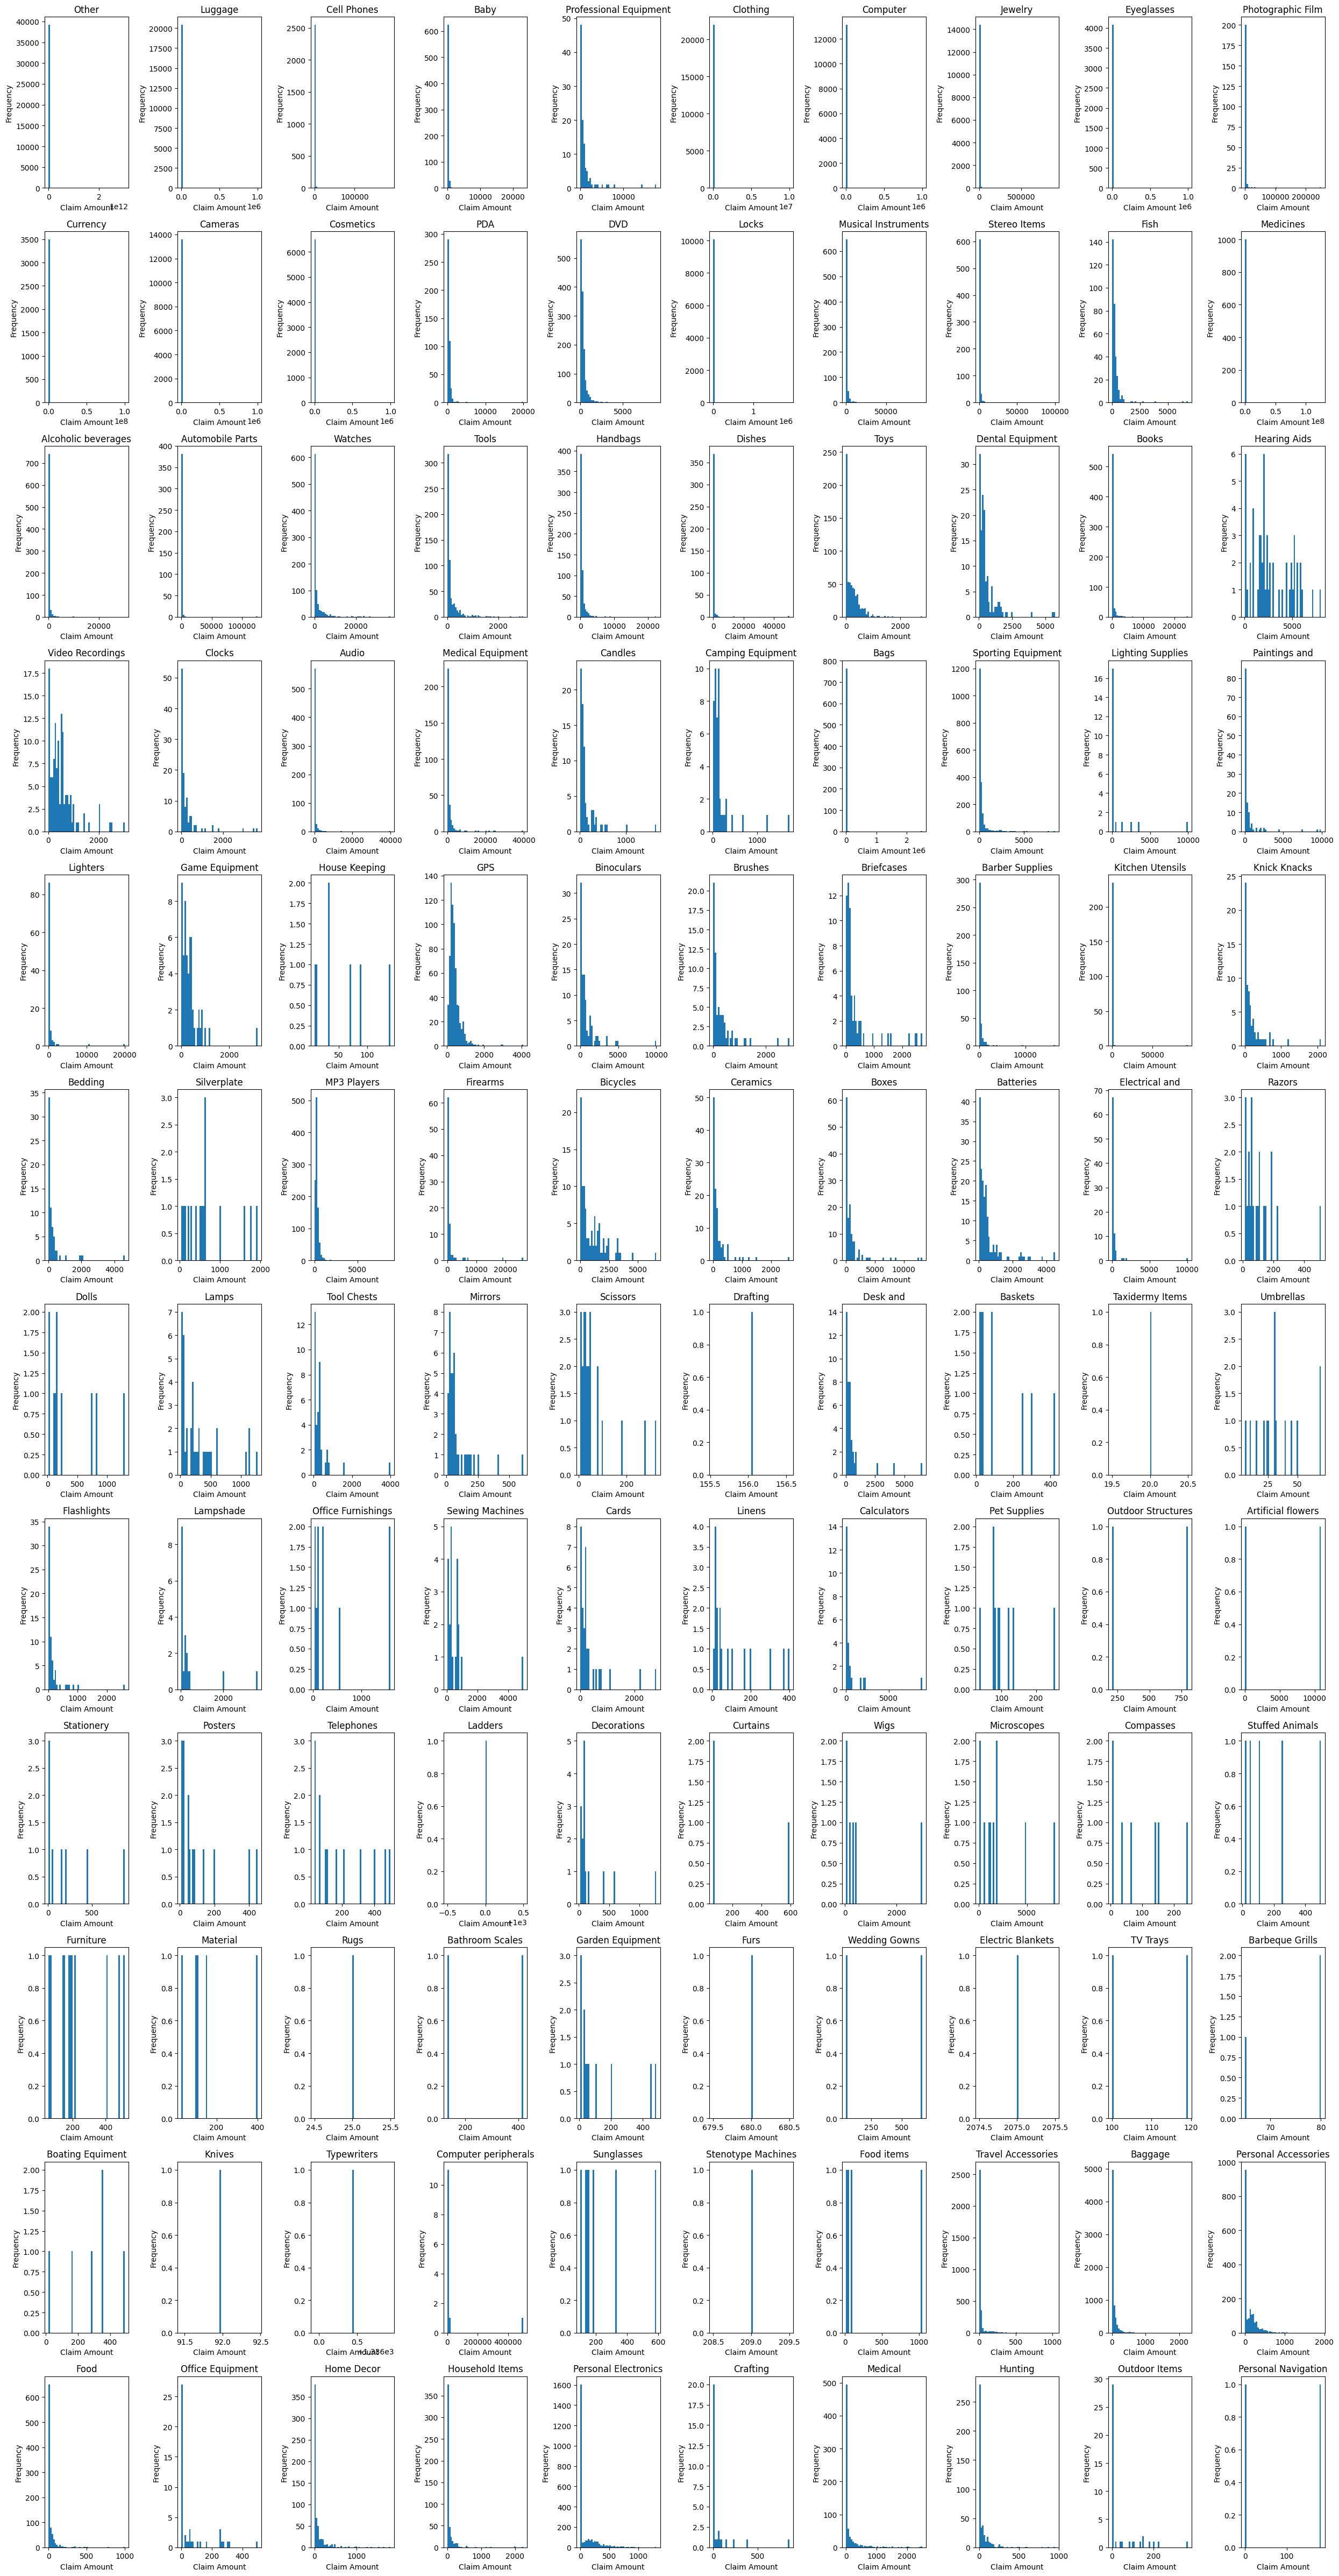

In [263]:
# Unique Item
items = df['Item'].unique()

# agar gambar tidak terlalu besar dan panjang, 
# kita akan kalkulasi kebutuhan kolom (dari histogram), disini saya menggunakan 10 gambar per kolomnya
num_items = len(items)
num_cols = 10
num_rows = (num_items + num_cols - 1) // num_cols

# Membuat subplot berdasarkan kebutuhan kolom dan baris 
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 4*num_rows))

# Looping setiap Item dan membuatkan histogram dalam loop itu
for i, item in enumerate(items):
    item_data = df[df['Item'] == item]['Claim Amount']
    row = i // num_cols
    col = i % num_cols
    axs[row, col].hist(item_data, bins=50)
    axs[row, col].set_title(f'{item}')
    axs[row, col].set_xlabel('Claim Amount')
    axs[row, col].set_ylabel('Frequency')

# Adjustment untuk ukuran agar fit dengan baik
fig.tight_layout()
plt.show()

Secara kasat mata, terlihat bahwa mayoritas menggambarkan data yang tidak normal, namun hal ini belum cukup untuk membuktikan, karena kita tidak tahu berapa sample yang digunakan setiap `Item`. oleh karena itu test yang lebih mendetail dibutuhkan, disini saya menggunakan **shapiro-wilk** test dan membuat DataFrame

In [264]:
# Import scipy.stats 
import scipy.stats as stats

# Membuat DataFrame kosong dengan kolom Item 
shapiro_df = pd.DataFrame(columns=['Item', 'Distribution'])

# Unique Item
items = df['Item'].unique()

# Loop Item dan lakukan shapiro test setiap Itemnya
for i, item in enumerate(items):
    item_data = df[df['Item'] == item]['Claim Amount'].dropna()
    
    # membuat if-clause = 1 dimana yang Item dengan sample hanya 1
    if len(item_data) == 1: 
        shapiro_df.loc[i] = [item, '1']
        continue
    # membuat if-clause = 2 dimana yang Item dengan sample hanya 2 
    elif len(item_data) == 2:
        shapiro_df.loc[i] = [item, '2']
        continue

    _, p_value = stats.shapiro(item_data)
    
    # Jika >= 3 maka shapiro-wilk test bisa di jalankan
    if p_value <= 0.05:
        shapiro_df.loc[i] = [item, 'Not Normal']
    else:
        shapiro_df.loc[i] = [item, 'Normal']

# display the results dataframe
shapiro_df

Item Distribution
0    Other                   Not Normal 
1    Luggage                 Not Normal 
2    Cell Phones             Not Normal 
3    Baby                    Not Normal 
4    Professional Equipment  Not Normal 
..                      ...         ... 
115  Crafting                Not Normal 
116  Medical                 Not Normal 
117  Hunting                 Not Normal 
118  Outdoor Items           Not Normal 
119  Personal Navigation     2          

[120 rows x 2 columns]

In [265]:
shapiro_df['Distribution'].unique()

array(['Not Normal', 'Normal', '1', '2'], dtype=object)

Melakukan test dari **shapiro** dengan memberikan *if-clause* kepada `Item` yang memiliki `Claim Amount` hanya **1** dan **2**, dan mengembalikannya menjadi **1** dan **2**, hal ini dilakukan juga karena **shapiro-wilk** test memiliki batasan hingga 3 sample (Dikutip dari journal [J. P. Royston](https://www.jstor.org/stable/2347973), 1982, *Journal of the Royal Statistical Society. Series C (Applied Statistics*))

Table diatas hanya berfungsi untuk mendeteksi apakah `Item` tertentu normal atau tidak, berdasarkan *unique value*, terdapat data, tidak normal, normal dan `Item` dengan sample **1** dan **2**, oleh karena itu imputasi dari *mean*,*median*,*modus* dibutuhkan

In [266]:
# group data by Item, lalu menggunakan aggregare function dengan mean,median dan mode (menggunakan lambda)
mmm_data = df.groupby('Item')['Claim Amount'].agg(['mean', 'median', lambda x: stats.mode(x)[0][0]])

# Rename nama kolom
mmm_data.columns = ['Mean', 'Median', 'Modus']

# reset index agar item menjadi kolom
mmm_data = mmm_data.reset_index()

# rename the column to be more descriptive
mmm_data = mmm_data.rename(columns={'index': 'Item'})

# display the resulting DataFrame
mmm_data

Item    Mean  Median  Modus
0    Alcoholic beverages 317.52  75.50   50.00 
1    Artificial flowers  5467.91 5467.91 15.22 
2    Audio               348.07  50.00   0.00  
3    Automobile Parts    596.33  0.00    0.00  
4    Baby                232.90  159.99  200.00
..    ...                   ...     ...     ...
115  Umbrellas           33.13   30.00   30.00 
116  Video Recordings    522.56  399.00  600.00
117  Watches             1453.86 341.49  150.00
118  Wedding Gowns       356.72  356.72  44.44 
119  Wigs                677.41  246.55  42.39 

[120 rows x 4 columns]

Setelah table mean, median dan modus sudah dibuat, langkah selanjutnya adalah melakukan *merging* **shapiro-wilk** *result* terlebih dahulu, baru nanti akan merge tabel mean, median dan modus

In [267]:
merge = df.merge(shapiro_df, on='Item',how='left')
merge.head(5)

Claim Number Date Received Incident Date Airport Code  \
0  0909802M      2002-12-12    2002-01-04     EWR           
1  0202417M      2004-01-16    2002-02-02     SEA           
2  0202445M      2003-11-26    2002-02-04     STL           
3  0909816M      2003-01-06    2002-02-07     MIA           
4  2005032379513 2005-02-05    2002-02-18     MCO           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     Alaska Airlines       Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   
3  Miami International Airport      American Airlines     Property Damage   
4  Orlando International Airport    Delta (Song)          Property Damage   

        Claim Site         Item  Claim Amount    Status  Close Amount  \
0  Checkpoint       Other       350.00         Approved 350.00          
1  Checked Baggage  Luggage     100.00         Settled  50.00           
2  Checked Baggage  Cell Phones 278.88         Settled  227.92          
3  Checkpoint       Luggage     50.00          Approved 50.00           
4  Checkpoint       Baby        84.79          Approved 84.79           

       Disposition Distribution  
0  Approve in Full  Not Normal   
1  Settle           Not Normal   
2  Settle           Not Normal   
3  Approve in Full  Not Normal   
4  Approve in Full  Not Normal

Setelah memasukkan Distribution, maka langkah selanjutnya adalah memasukkan mean,median modus

In [268]:
merged = merge.merge(mmm_data, on='Item',how='left')
merged.head(3)

Claim Number Date Received Incident Date Airport Code  \
0  0909802M    2002-12-12    2002-01-04     EWR           
1  0202417M    2004-01-16    2002-02-02     SEA           
2  0202445M    2003-11-26    2002-02-04     STL           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     Alaska Airlines       Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   

        Claim Site         Item  Claim Amount    Status  Close Amount  \
0  Checkpoint       Other       350.00         Approved 350.00          
1  Checked Baggage  Luggage     100.00         Settled  50.00           
2  Checked Baggage  Cell Phones 278.88         Settled  227.92          

       Disposition Distribution        Mean  Median  Modus  
0  Approve in Full  Not Normal  76869407.56 89.99   0.00    
1  Settle           Not Normal  360.19      100.79  100.00  
2  Settle           Not Normal  495.16      200.00  200.00

Setelah sudah termerge semua dalam variable `merged`, berikut skenario imputasi NaN value:

| Distribution per Item | Mean | Median | Modus
|-----------------------|------|--------|--------
| Normal                |&#9745;|&#9744;|&#9744;
| Not Normal            |&#9744;|&#9745;|&#9744;
| 1                     |&#9744;|&#9744;|&#9745;
| 2                     |&#9745;|&#9745;|&#9744;

Dimana Normal menggunakan mean, Tidak normal menggunakan median, untuk 1 sample menggunakan modus, dan untuk 2 sample bisa menggunakan median atau mean (karena menghasilkan nilai yang sama), dengan itu perlu menggunakan *for loop* untuk memulai imputasi

In [269]:
# Total missing value 
print('Missing Value dari Claim Amount: {}'.format(merged['Claim Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Claim Amount: {}'.format(merged['Claim Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Amount: 14986

Persentase Missing Value Claim Amount: 7.451384020246921


In [270]:
# print index dari NaN untuk cek perubahan
print(merged[(merged['Distribution']=='Normal')&(merged['Claim Amount'].isna())].head(1).index)
print(merged[(merged['Distribution']=='Not Normal')&(merged['Claim Amount'].isna())].head(1).index)
print(merged[(merged['Distribution']=='1')&(merged['Claim Amount'].isna())].head(1).index)
print(merged[(merged['Distribution']=='2')&(merged['Claim Amount'].isna())].head(1).index)

Int64Index([], dtype='int64')
Int64Index([63], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([192901], dtype='int64')


Terlihat, ternyata `Claim Amount` dengan distribusi Normal dan 1 tidak memiliki missing value<br>
namun tetap kita akan lihat perubahannya nanti pada index : 63 dan 192930 (Not Normal dan 2)

In [271]:
# define a function to impute missing Claim Amount values based on the Distribution type
def impute_claim_amount(row):
    if pd.isna(row['Claim Amount']):
        if row['Distribution'] == 'Normal':
            return row['Mean']
        elif row['Distribution'] == 'Not Normal':
            return row['Median']
        elif row['Distribution'] == '1':
            return row['Modus']
        elif row['Distribution'] == '2':
            return row['Median']
    else:
        return row['Claim Amount']
    
# apply the imputation function to the dataframe
merged['Claim Amount'] =merged.apply(impute_claim_amount, axis=1)

In [272]:
# cek perubahan pada Index yang tersimpan
merged.iloc[[63,192930]]

Claim Number Date Received Incident Date Airport Code  \
63      0616802L      2002-10-07    2002-08-07     CMH           
192930  2016010828211 2015-12-24    2015-06-22     ATL           

                                            Airport Name        Airline Name  \
63      Port Columbus International                       Southwest Airlines   
192930  Hartsfield-Jackson Atlanta International Airport  Southwest Airlines   

             Claim Type  Claim Site   Item  Claim Amount    Status  \
63      Personal Injury  Checkpoint  Other 89.99          Canceled   
192930  Personal Injury  Checkpoint  Other 89.99          NaN        

        Close Amount Disposition Distribution        Mean  Median  Modus  
63     0.00           NaN         Not Normal  76869407.56 89.99   0.00    
192930 NaN            NaN         Not Normal  76869407.56 89.99   0.00

imputasi `Claim Amount` sudah sukses, dengan mengimputasi dengan median

In [273]:
# Total missing value 
print('Missing Value dari Claim Amount: {}'.format(merged['Claim Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Claim Amount: {}'.format(merged['Claim Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Amount: 0

Persentase Missing Value Claim Amount: 0.0


Sudah tidak ada lagi *missing value* pada `Claim Amount`

In [274]:
# drop kolom distribution, mean, median dan modus
merged.drop(['Distribution','Mean','Median','Modus'],axis=1,inplace=True)
merged

Claim Number Date Received Incident Date Airport Code  \
0       0909802M      2002-12-12    2002-01-04     EWR           
1       0202417M      2004-01-16    2002-02-02     SEA           
2       0202445M      2003-11-26    2002-02-04     STL           
3       0909816M      2003-01-06    2002-02-07     MIA           
4       2005032379513 2005-02-05    2002-02-18     MCO           
...               ...        ...           ...     ...           
201112  2015120427297 2015-11-20    2015-10-16     ORD           
201113  2015123027969 2015-12-17    2015-12-02     ORD           
201114  2016010428072 2015-12-22    2015-12-20     JFK           
201115  2016011328300 2015-12-30    2015-12-28     JFK           
201116  2015123128015 2015-12-31    2015-11-23     JFK           

                                Airport Name          Airline Name  \
0       Newark International Airport          Continental Airlines   
1       Seattle-Tacoma International          Alaska Airlines        
2       Lambert St. Louis International       American Airlines      
3       Miami International Airport           American Airlines      
4       Orlando International Airport         Delta (Song)           
...                               ...                  ...           
201112  Chicago O'Hare International Airport  UAL                    
201113  Chicago O'Hare International Airport  UAL                    
201114  John F. Kennedy International         Jet Blue               
201115  John F. Kennedy International         Jet Blue               
201116  John F. Kennedy International         Jet Blue               

                     Claim Type       Claim Site                  Item  \
0       Property Damage          Checkpoint       Other                  
1       Property Damage          Checked Baggage  Luggage                
2       Property Damage          Checked Baggage  Cell Phones            
3       Property Damage          Checkpoint       Luggage                
4       Property Damage          Checkpoint       Baby                   
...                 ...                 ...        ...                   
201112  Property Damage          Checked Baggage  Baggage                
201113  Property Damage          Checked Baggage  Audio                  
201114  Passenger Property Loss  Checked Baggage  Clothing               
201115  Passenger Property Loss  Checked Baggage  Tools                  
201116  Passenger Property Loss  Checkpoint       Personal Accessories   

        Claim Amount    Status  Close Amount      Disposition  
0      350.00         Approved 350.00         Approve in Full  
1      100.00         Settled  50.00          Settle           
2      278.88         Settled  227.92         Settle           
3      50.00          Approved 50.00          Approve in Full  
4      84.79          Approved 84.79          Approve in Full  
...      ...               ...   ...                      ...  
201112 0.00           NaN      NaN            NaN              
201113 50.00          NaN      NaN            NaN              
201114 100.00         NaN      NaN            NaN              
201115 53.80          NaN      NaN            NaN              
201116 0.00           NaN      NaN            NaN              

[201117 rows x 13 columns]

In [275]:
# kembalikan hasil merged ke dalam df
df = merged

In [276]:
# cek missing value dalam df
# Total missing value 
print('Missing Value dari Claim Amount: {}'.format(df['Claim Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Claim Amount: {}'.format(df['Claim Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Claim Amount: 0

Persentase Missing Value Claim Amount: 0.0


##### `Status`, `Close Amount` dan `Disposition`

Hal pertama yang bisa dilakukan adalah pengisian `Close Amount` berdasarkan `Claim Amount`, seperti pada awal pengisian `Claim Amount`, dan juga dibantu dengan `Disposition`

In [277]:
# Total missing value 
print('Missing Value dari Close Amount: {}'.format(df['Close Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Close Amount: {}'.format(df['Close Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Close Amount: 67468

Persentase Missing Value Close Amount: 33.5466420044054


Persentase *missing value*-nya sangatlah tinggi, dan pastinya menghapusnya bukan pilihan yang baik, kita akan melakukan pendekatan lain

In [278]:
# Cek Close Amount NaN & Claim amount notna()
print('Total Close Amount yang Nan, tapi Claim Amount > 0:\n{}'.format(df[(df['Close Amount'].isna())&(df['Claim Amount'].notna())].shape[0]))

Total Close Amount yang Nan, tapi Claim Amount > 0:
67468


Terdapat 67470 baris dimana `Close Amount` bisa diisi dengan `Claim Amount`, berbeda dengan sebelumnya dimana menggunakan **> 0**, sekarang kita menggunakan
```python
.notna()
```
Karena, `Claim Amount` yang 0 dan `Close Amount` yang NaN bisa saja mengindikasikan penolakan karena tidak mencantumkan `Claim Amount`

In [279]:
# print total masing2 disposition
print('Disposition Approve: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Approve in Full')].shape[0]))
print('Disposition Settle: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Settle')].shape[0]))
print('Disposition Deny: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Deny')].shape[0]))

# Jumlah 
print('\nJumlah : {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Approve in Full')].shape[0] + 
                        df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Settle')].shape[0] + 
                        df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Deny')].shape[0]))

Disposition Approve: 125
Disposition Settle: 4
Disposition Deny: 1310

Jumlah : 1439


Jumlahnya masih sedikit dibandingkan dengan Total `Close Amount` yang Nan, tapi `Claim Amount` > 0, namun akan kita jalankan terlebih dahulu untuk pengimputasi `Close Amount` berdasarkan `Claim Amount` dan `Disposition`, masih dengan asumsi 'Settle' akan diimputasi dengan `Claim Amount`/2, Approve in Full akan diimputasi dengan `Claim Amount`, dan Deny akan diimputasi dengan nilai 0 (karena penolakan dari TSA, maka tidak ada nilai yang di bayarkan kepada pengaju)

In [280]:
# dengan .loc untuk mendapatkan lokasi row
df.loc[(df['Close Amount'].isna())&(df['Claim Amount'].notna())&(df['Disposition']=='Settle'), 'Close Amount'] = df['Claim Amount']/2
# menggunakan df['Close Amount']*2, karena ratio yang kita ambil 50%, artinya Claim Amount dua kali Close Amount

In [281]:
# imputasi dengan disposition 'Approve in Full'
df.loc[(df['Close Amount'].isna())&(df['Claim Amount'].notna())&(df['Disposition']=='Approve in Full'), 'Close Amount'] = df['Claim Amount']

In [282]:
# imputasi dengan disposition 'Deny'
df.loc[(df['Close Amount'].isna())&(df['Claim Amount'].notna())&(df['Disposition']=='Deny'), 'Close Amount'] = 0

In [283]:
# print total masing2 disposition
print('Disposition Approve: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Approve in Full')].shape[0]))
print('Disposition Settle: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Settle')].shape[0]))
print('Disposition Deny: {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Deny')].shape[0]))

# Jumlah 
print('\nJumlah : {}'.format(df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Approve in Full')].shape[0] + 
                        df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Settle')].shape[0] + 
                        df[(df['Claim Amount'].notna())&(df['Close Amount'].isna())&(df['Disposition']=='Deny')].shape[0]))

Disposition Approve: 0
Disposition Settle: 0
Disposition Deny: 0

Jumlah : 0


Setelah melakukan imputasi dengan `Claim Amount` dan `Disposition`, saatnya kita cek sisanya

In [284]:
# Total missing value 
print('Missing Value dari Close Amount: {}'.format(df['Close Amount'].isna().sum()))
# Persentase Missing value
print('\nPersentase Missing Value Close Amount: {}'.format(df['Close Amount'].isna().sum()/df.shape[0]*100))

Missing Value dari Close Amount: 66029

Persentase Missing Value Close Amount: 32.831138093746425


Pendekatan satu-satunya yang tersisa adalah imputasi `Close Amount` berdasarkan `Claim Amount` dan `Status`

Pertama-tama, kita akan lihat unique dari `Status` dan melihat masing2 `Status` memiliki `Disposition` apa saja

In [285]:
# Group the data by 'Status' and select the unique values in the 'Disposition' column for each group
grouped = df.groupby('Status')['Disposition'].unique()

# Create a new DataFrame from the grouped data
new_df = pd.DataFrame({'Status': grouped.index, 'Unique Disposition': grouped.values})

In [286]:
new_df

Status  \
0   Approve in Full                                                                                                                 
1   Approved                                                                                                                        
2   Canceled                                                                                                                        
3   Claim has been assigned for further investigation                                                                               
4   Closed as a contractor claim                                                                                                    
5   Denied                                                                                                                          
6   Deny                                                                                                                            
7   In litigation                                                                                                                   
8   In review                                                                                                                       
9   Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.   
10  Pending response from claimant                                                                                                  
11  Settle                                                                                                                          
12  Settled                                                                                                                         

                      Unique Disposition  
0   [nan]                                 
1   [Approve in Full]                     
2   [nan, Settle, Deny, Approve in Full]  
3   [nan]                                 
4   [nan]                                 
5   [Deny, nan]                           
6   [nan]                                 
7   [nan, Deny, Approve in Full, Settle]  
8   [nan, Deny, Approve in Full]          
9   [nan, Deny, Approve in Full]          
10  [Settle]                              
11  [nan]                                 
12  [Settle]

Melihat bahwa dalam `Status` ada beberapa kemiripan antara satu sama lain, dan juga ada beberapa `Status` yang digunakan juga di `Disposition`, dengan ini kita dapat simpulkan beberapa point:

1. `Status` Approved selalu memiliki `Disposition` Approve in Full, namun Status `Approve in Full` selalu menghasilkam `Disposition` NaN, hal ini bisa dijelaskan secara *domain knowledge* bahwa `Status` Approve in Full artinya semuanya sudah di bayarkan di tahap `Status`, namun agar bisa melengkapi data, kita akan gabungkan `Status` Approved & Approve in Full menjadi **Approve** dengan `Disposition` yang pasti yaitu **Approve in Full**

2. Point nomor 1 juga berlaku kepada `Status` Settle & Settled, dan juga Deny & Denied, maka akan diperlakukan sama, dimana gabungan dari settle dalam `Status` akan menjadi **Settle** dan `Disposition` akan menjadi **Settled**, lalu untuk gabungan dari deny dalam `Status` akan menjadi **Deny** dan `Disposition` akan menjadi **Denied**, hal ini dapat dilihat dibawah ini:
    
    | Status | New Status | | Disposition | New Disposition 
    |--------|------------|-|-------------|-----------------
    | Approve in Full | Approve | | Approve in Full | Approve in Full
    | Approved | Approve | | | 
    | Denied | Deny | | Deny | Denied
    | Deny | Deny | |   | 
    | Settle | Settle | | Settle | Settled
    | Settled | Settle | | |

<br>

3. Untuk `Status` yang lainnya memiliki beragam macam, dari lebih dari 2 tipe `Disposition` dan juga yang hanya mengandung *NaN*, untuk `Status` yang lainnya hanya akan dibenarkan penulisan, dimana akan dipersingkat, seperti dibawah ini:
    
    | Status | Status Renamed 
    |--------|----------------
    | Canceled | Canceled 
    | Claim has been assigned for further investigation | Investigated
    |Closed as a contractor claim | Contractor Claim
    | In litigation | In litigation
    | In review | In review
    | Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.|Insufficent
    | Pending response from claimant | Pending Claimant

In [287]:
replacement = {'Status':{'Claim has been assigned for further investigation' : 'Investigated', 
'Closed as a contractor claim' : 'Contractor Claim', 
'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.':'Insufficent',
'Pending response from claimant' : 'Pending Claimant', 'Approve in Full' : 'Approve', 'Approved' : 'Approve', 'Denied' : 'Deny', 'Settled' : 'Settle'
},
'Disposition':{'Deny' : 'Denied', 'Settle' : 'Settled'}}

In [288]:
df.replace(replacement, inplace=True)

In [289]:
# Group the data by 'Status' and select the unique values in the 'Disposition' column for each group
grouped = df.groupby('Status')['Disposition'].unique()

# Create a new DataFrame from the grouped data
new_df = pd.DataFrame({'Status': grouped.index, 'Unique Disposition': grouped.values})
new_df

Status                       Unique Disposition
0  Approve           [Approve in Full, nan]                 
1  Canceled          [nan, Settled, Denied, Approve in Full]
2  Contractor Claim  [nan]                                  
3  Deny              [Denied, nan]                          
4  In litigation     [nan, Denied, Approve in Full, Settled]
5  In review         [nan, Denied, Approve in Full]         
6  Insufficent       [nan, Denied, Approve in Full]         
7  Investigated      [nan]                                  
8  Pending Claimant  [Settled]                              
9  Settle            [Settled, nan]

Sekarang bisa dilakukan pengisian `Close Amount` dan juga `Disposition`

In [290]:
# cek missing 
print('Close Amount dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Approve: 12340
Persentase Close Amount dengan Approve: 6.135731937131123

Disposition dengan Approve: 12340
Persentase Disposition dengan Approve: 6.135731937131123


Terdapat 12340 missing value pada `Close Amount` dan `Disposition` pada `Status` Approve, oleh karena itu akan kita lakukan Imputasi 

In [291]:
# Pengisian close amount dengan status approve
df.loc[(df['Status']=='Approve')&(df['Close Amount'].isna()), 'Close Amount'] = df['Claim Amount']

In [292]:
# pengisian disposition dengan status approve
df.loc[(df['Status']=='Approve')&(df['Disposition'].isna()), 'Disposition'] = 'Approve in Full'

In [293]:
# cek missing 
print('Close Amount dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Approve: {}'.format(df[(df['Status']=='Approve')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Approve: 0
Persentase Close Amount dengan Approve: 0.0

Disposition dengan Approve: 0
Persentase Disposition dengan Approve: 0.0


Sudah tidak ada missing data, Sekarang kita akan lakukan pada status settle

In [294]:
# cek missing 
print('Close Amount dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Settle: 5756
Persentase Close Amount dengan Settle: 2.8620156426358787

Disposition dengan Settle: 5756
Persentase Disposition dengan Settle: 2.8620156426358787


Lalu untuk mengimputasi settle, seperti diatas sudah dijelaskan bahwa rationya adalah 50%, oleh karena itu pengimputasian `Close Amount` menggunakan `Claim Amount`/2

In [295]:
# Pengisian close amount dengan status Settle
df.loc[(df['Status']=='Settle')&(df['Close Amount'].isna()), 'Close Amount'] = df['Claim Amount']/2

In [296]:
# pengisian disposition dengan status Settle
df.loc[(df['Status']=='Settle')&(df['Disposition'].isna()), 'Disposition'] = 'Settled'

In [297]:
# cek missing 
print('Close Amount dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Settle: {}'.format(df[(df['Status']=='Settle')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Settle: 0
Persentase Close Amount dengan Settle: 0.0

Disposition dengan Settle: 0
Persentase Disposition dengan Settle: 0.0


Lakukan yang sama juga pada deny

In [298]:
# cek missing 
print('Close Amount dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Deny: 28228
Persentase Close Amount dengan Deny: 14.035611111939817

Disposition dengan Deny: 28237
Persentase Disposition dengan Deny: 14.040086119025244


bisa dilihat missing data keduanya menyampai 14%, `Close Amount` akan diimputasi menggunakan 0 karena status deny akan membatalkan `Claim Amount` dan berakhir tidak ada pembayaran dari TSA, lalu `Disposition` diisikan dengan `Denied`

In [299]:
# Pengisian close amount dengan status deny
df.loc[(df['Status']=='Deny')&(df['Close Amount'].isna()), 'Close Amount'] = 0

In [300]:
# pengisian disposition dengan status deny
df.loc[(df['Status']=='Deny')&(df['Disposition'].isna()), 'Disposition'] = 'Denied'

In [301]:
# cek missing 
print('Close Amount dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Close Amount'].isna())].shape[0]))
print('Persentase Close Amount dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Close Amount'].isna())].shape[0]/df['Status'].shape[0]*100))
print('\nDisposition dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Disposition'].isna())].shape[0]))
print('Persentase Disposition dengan Deny: {}'.format(df[(df['Status']=='Deny')&(df['Disposition'].isna())].shape[0]/df['Status'].shape[0]*100))

Close Amount dengan Deny: 0
Persentase Close Amount dengan Deny: 0.0

Disposition dengan Deny: 0
Persentase Disposition dengan Deny: 0.0


Dilihat sudah tidak ada lagi status yang *missing value* dari deny

Kita akan isi *missing value* dari `Disposition` menggunakan `Close Amount`, dengan:
 - `Close Amount` = 0 : Denied
 - `Close Amount` > 0 & `Close Amount` != `Claim Amount` : Settled
 - `Close Amount` = `Claim Amount` : Approve in Full

In [302]:
# Cek missing value
print('Close amount = 0: {}'.format(df[(df['Close Amount']==0)&(df['Disposition'].isna())].shape[0]))
print('Close amount > 0 & != Claim Amount: {}'.format(df[(df['Close Amount']>0)&(df['Disposition'].isna())&(df['Close Amount']!=df['Claim Amount'])].shape[0]))
print('Close amount = Claim Amount: {}'.format(df[(df['Disposition'].isna())&(df['Close Amount']==df['Claim Amount'])].shape[0]))

Close amount = 0: 5058
Close amount > 0 & != Claim Amount: 12
Close amount = Claim Amount: 99


In [303]:
# pengisian dengan denied
df.loc[(df['Close Amount']==0)&(df['Disposition'].isna()),'Disposition'] = 'Denied'

In [304]:
# pengisian dengan Settled
df.loc[(df['Close Amount']>0)&(df['Disposition'].isna())&(df['Close Amount']!=df['Claim Amount']),'Disposition'] = 'Settled'

In [305]:
# pengisian dengan Approve in Full
df.loc[(df['Disposition'].isna())&(df['Close Amount']==df['Claim Amount']),'Disposition'] = 'Approve in Full'

In [306]:
# Cek missing value
print('Close amount sama dengan 0: {}'.format(df[(df['Close Amount']==0)&(df['Disposition'].isna())].shape[0]))
print('Close amount lebih besar 0 & tidak sama dengan Claim Amount: {}'.format(df[(df['Close Amount']>0)&(df['Disposition'].isna())&(df['Close Amount']!=df['Claim Amount'])].shape[0]))
print('Close amount sama dengan Claim Amount: {}'.format(df[(df['Disposition'].isna())&(df['Close Amount']==df['Claim Amount'])].shape[0]))

Close amount sama dengan 0: 0
Close amount lebih besar 0 & tidak sama dengan Claim Amount: 0
Close amount sama dengan Claim Amount: 0


Jadi, sampai titik ini, berikut rangkuman dari *missing value*

In [307]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     0    
Airport Name     0    
Airline Name     0    
Claim Type       0    
Claim Site       0    
Item             0    
Claim Amount     0    
Status           12639
Close Amount     19705
Disposition      19705
dtype: int64

Dimana diketahui bahwa `Close Amount` dan `Disposition` sudah saling mengisi, dan juga `Status` tidak bisa banyak membantu untuk mengisi `Close Amount` dan `Disposition`

Namun, dengan *domain knowledge*, dimana suatu `Claim Amount` yang diajukan bisa saja berhenti sampai titik `Status` saja, dan juga banyak dari `Status` yang tidak memiliki `Close Amount` dan `Disposition`, ini bisa dijelaskan bahwa `Status` tertentu memiliki kecenderungan untuk tidak lanjut untuk di proses, oleh karena itu sisa dari *NaN* value yang belum terisi akan diisikan sebagai berikut:

| Column | Missing Value 
|--------|---------------
| Status | No Status
| Close Amount | 0
| Disposition | Undetermined

dimana:
1. status diisikan dengan No Status yang mengartikan pengajuan klaim berhenti sampai titik Status
2. otomatis jika kebanyakan `Status` tidak memiliki `Disposition` akan sulit untuk menentukan `Close Amount` maka diberikan angka 0 dengan asumsi tidak ada tindak lanjut dari TSA 
3. `Disposition` merupakan status terakhir dari suatu ajuan klaim, oleh karena itu `Disposition` akan diberikan Undetermined yang menunjukkan bahwa ajuan klaim blm menemui putusan akhir

In [308]:
# Fillna Status, Close Amount dan Disposition
df['Status'].fillna('No Status',inplace=True)
df['Close Amount'].fillna(0,inplace=True)
df['Disposition'].fillna('Undetermined',inplace=True)

In [309]:
df[['Status','Close Amount','Disposition']].isna().sum()

Status          0
Close Amount    0
Disposition     0
dtype: int64

Sudah tidak ada lagi *missing value* pada `Status`, `Close amount` dan `Disposition`

Selain itu ada sedikit tambahan dalam perubahan `Close Amount` dalam status `Denied` yang diatas 0

In [310]:
# perubahan value dimana Denied > 0
df.loc[(df['Disposition'] == 'Denied')&(df['Close Amount']>0), 'Close Amount'] = 0

Hal ini dilakukan karena memiliki disposition yang pasti `Denied` pengisian 0 menandakan adanya penolakan, dengan ini seluruh value bisa dinyatakan sudah aman

#### Outlier

Outlier sebagai observasi yang menyimpang begitu banyak dari pengamatan lain, sehingga menimbulkan estimasi parameter bias dan hasil yang salah ([Ben-Gal, I. (2005).](https://link.springer.com/chapter/10.1007/0-387-25465-X_7#citeas)), hal ini memerlukan kita untuk mengatasi adanya outlier

Secara garis besar outlier sudah diindikasikan saat eksplorasi data, namun kali ini saya akan melakukan pendekatan yang lebih detail

Pendekatan yang digunakan adalah mendeteksi outlier dari menggrouping `Claim Amount` by `Item`

Pertama kita lihat untuk gambaran besar outlier dari `Claim Amount` tiap `Item` dengan boxplot

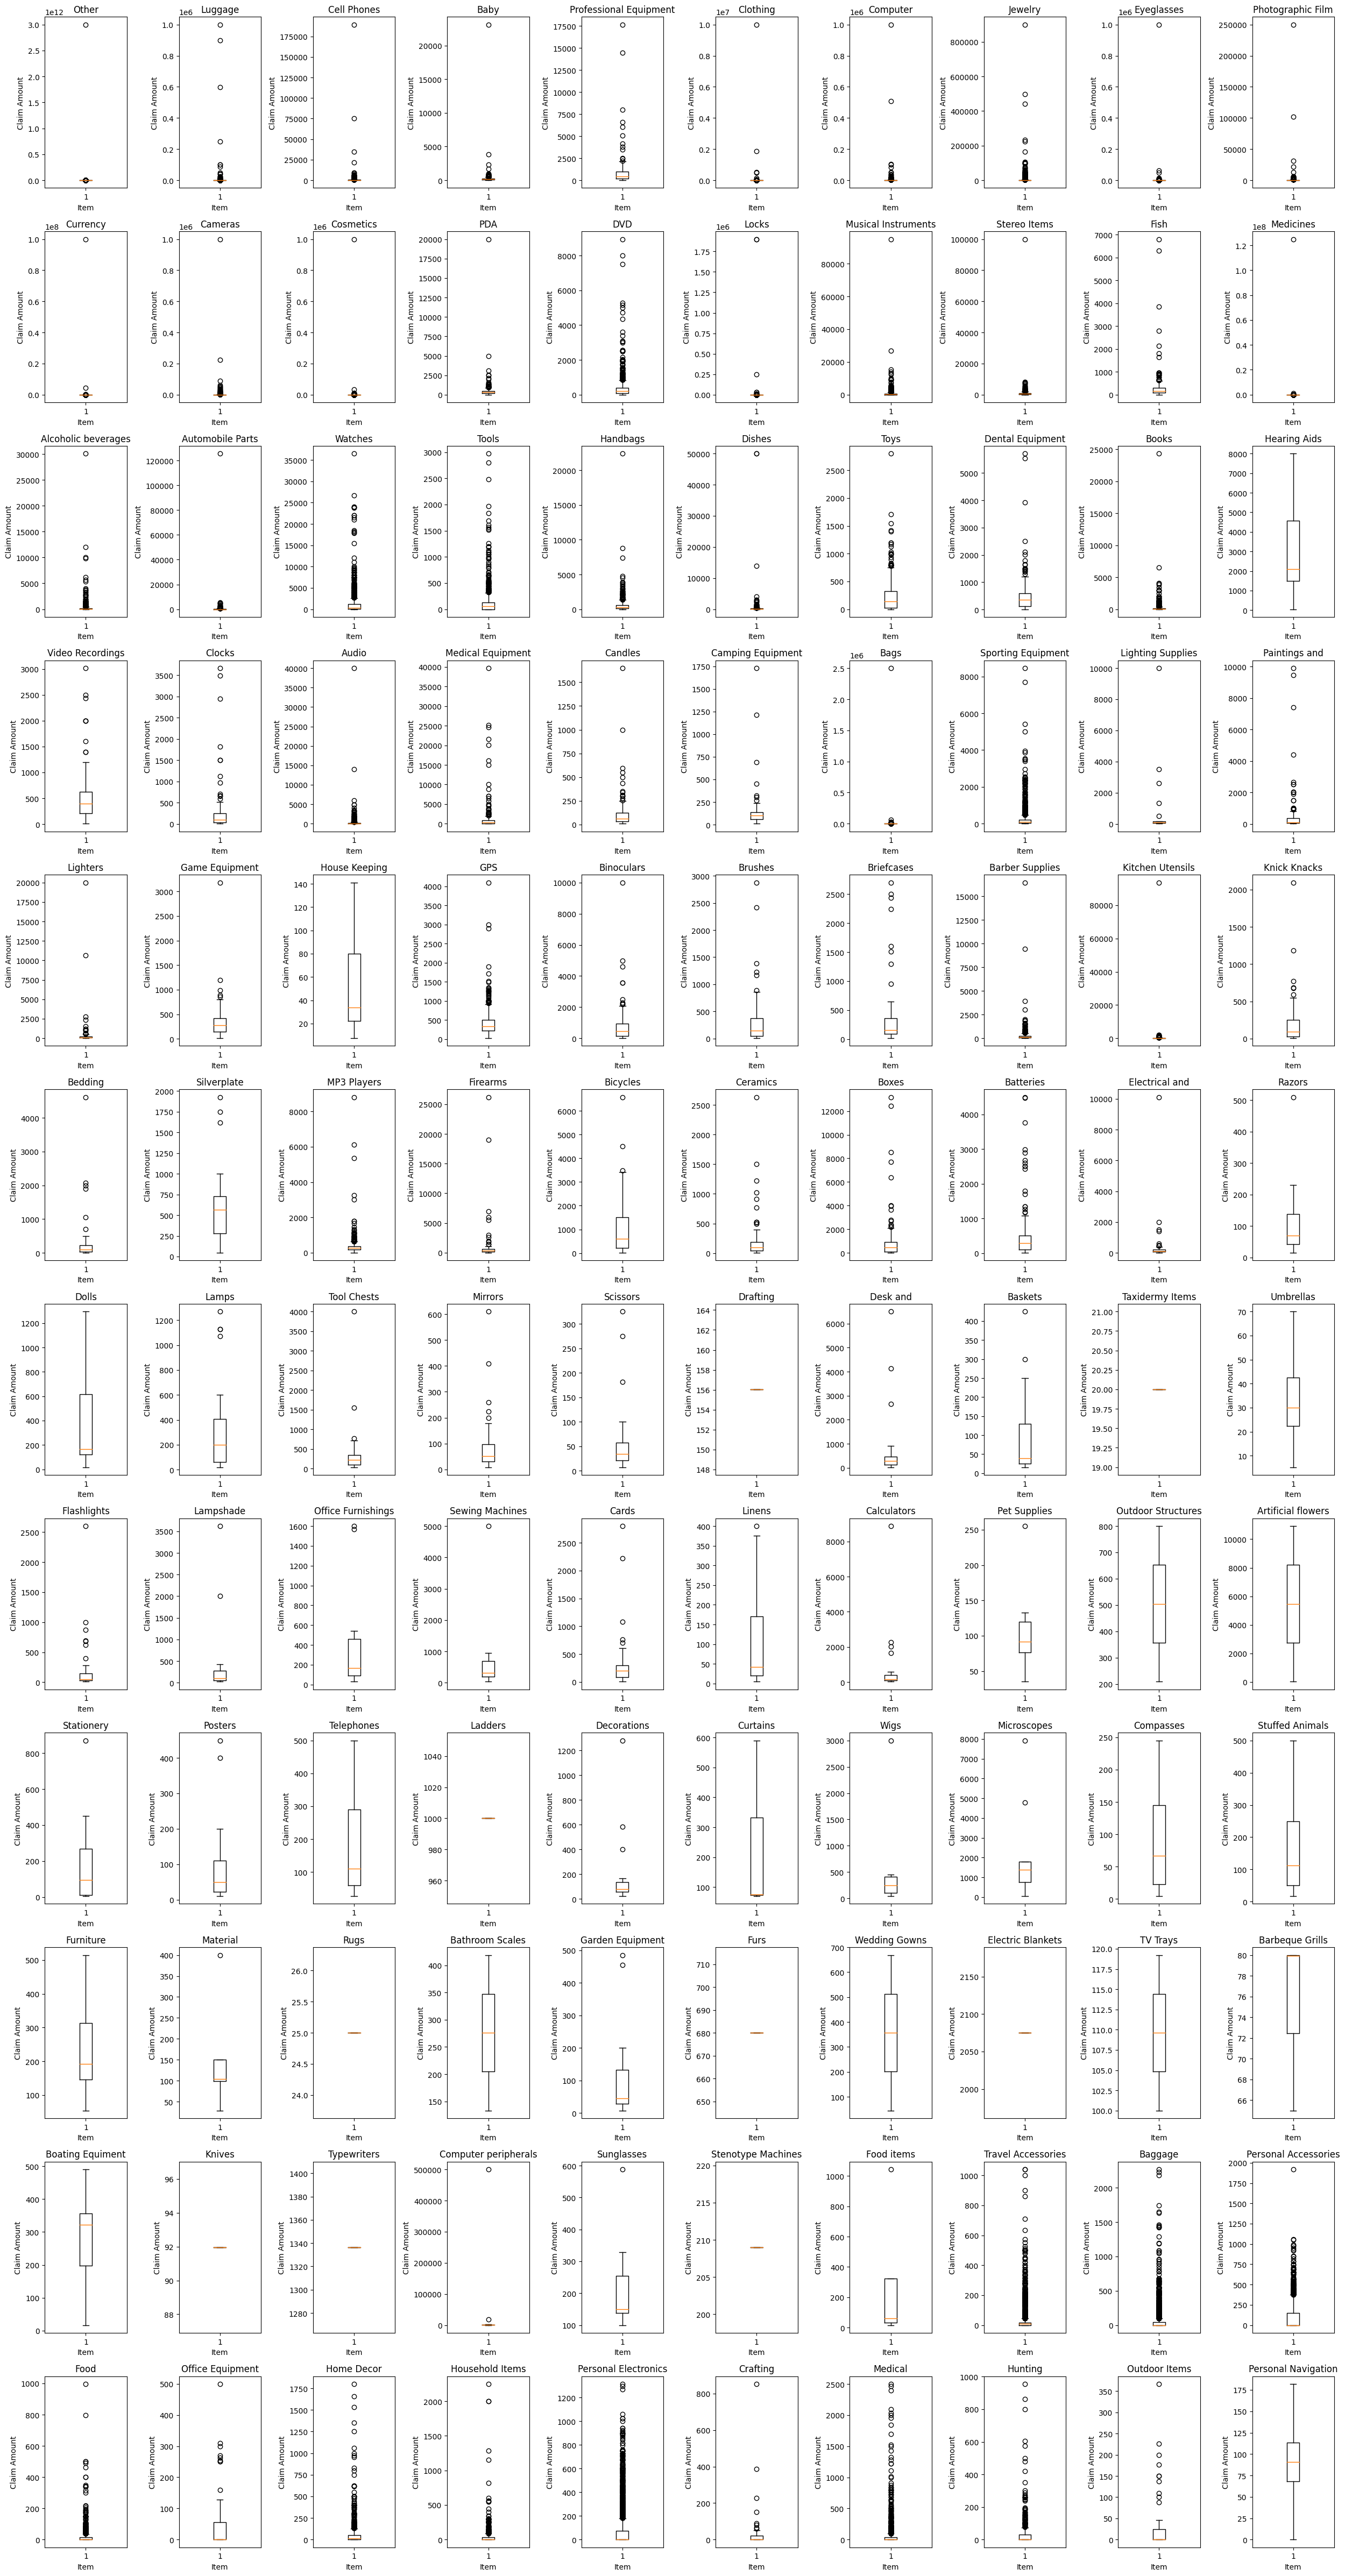

In [311]:
# Unique Item
items = df['Item'].unique()

# agar gambar tidak terlalu besar dan panjang, 
# kita akan kalkulasi kebutuhan kolom (dari histogram), disini saya menggunakan 10 gambar per kolomnya
num_items = len(items)
num_cols = 10
num_rows = (num_items + num_cols - 1) // num_cols

# Membuat subplot berdasarkan kebutuhan kolom dan baris 
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 4*num_rows))

# Looping setiap Item dan membuatkan boxplot dalam loop itu
for i, item in enumerate(items):
    item_data = df[df['Item'] == item]['Claim Amount']
    row = i // num_cols
    col = i % num_cols
    axs[row, col].boxplot(item_data)
    axs[row, col].set_title(f'{item}')
    axs[row, col].set_xlabel('Item')
    axs[row, col].set_ylabel('Claim Amount')

# Adjustment untuk ukuran agar fit dengan baik
fig.tight_layout()
plt.show()

Hal ini terlihat bahwa ada beberapa Item yang memiliki outlier dan ada juga yang tidak memiliki outlier, oleh karena itu kita akan menggunakan pendeteksian outlier yang cukup mudah dan sering digunakan, yaitu dengan IQR:

In [312]:
outlier = df.groupby('Item')['Claim Amount'].describe().reset_index()

In [313]:
outlier = outlier[['Item','75%','25%']]
outlier.head(3)

Item     75%     25%
0  Alcoholic beverages 200.00  36.00  
1  Artificial flowers  8194.26 2741.57
2  Audio               182.05  0.00

Setelah membuat DataFrame dengan `75%` dan `25%`, kita bisa menambahkan `IQR`

In [314]:
outlier['IQR'] = outlier['75%'] - outlier['25%']
outlier.head(3)

Item     75%     25%     IQR
0  Alcoholic beverages 200.00  36.00   164.00 
1  Artificial flowers  8194.26 2741.57 5452.69
2  Audio               182.05  0.00    182.05

setelah `IQR` sudah ditambah, sekarang untuk menambah `outlier`

In [315]:
outlier['outlier'] = outlier['75%'] + 1.5*outlier['IQR']
outlier.head(3)

Item     75%     25%     IQR  outlier
0  Alcoholic beverages 200.00  36.00   164.00  446.00  
1  Artificial flowers  8194.26 2741.57 5452.69 16373.29
2  Audio               182.05  0.00    182.05  455.12

`outlier` sudah di tambah sekarang `25%` dan `IQR` sudah bisa di drop

In [316]:
outlier = outlier.drop(['25%','IQR'],axis=1)
outlier.head(3)

Item     75%  outlier
0  Alcoholic beverages 200.00  446.00  
1  Artificial flowers  8194.26 16373.29
2  Audio               182.05  455.12

Dengan DataFrame **outlier**, kita akan melakukan join dengan original dataframe, yaitu **df**

In [317]:
df = df.merge(outlier,on='Item',how='left')
df.head(3)

Claim Number Date Received Incident Date Airport Code  \
0  0909802M    2002-12-12    2002-01-04     EWR           
1  0202417M    2004-01-16    2002-02-02     SEA           
2  0202445M    2003-11-26    2002-02-04     STL           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     Alaska Airlines       Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   

        Claim Site         Item  Claim Amount   Status  Close Amount  \
0  Checkpoint       Other       350.00         Approve 350.00          
1  Checked Baggage  Luggage     100.00         Settle  50.00           
2  Checked Baggage  Cell Phones 278.88         Settle  227.92          

       Disposition    75%  outlier  
0  Approve in Full 230.00 525.50    
1  Settled         200.00 423.50    
2  Settled         365.01 762.53

Setelah itu, kita memerlukan yang namanya `ratio detector` dimana kolom ini berfungsi untuk mendeteksi mana saja yang akan di adjust karena melewati `outlier`, selain itu, fungsi lain dari `ratio detector` yaitu untuk menyimpan rasio awal antara `Close Amount`/`Claim Amount` yang dibutuhkan untuk adjustment `Close Amount` pada disposition Settled.

In [318]:
df['ratio detector'] = np.where(df['Claim Amount']>df['outlier'],df['Close Amount']/df['Claim Amount'],np.nan)
df.head(3)

Claim Number Date Received Incident Date Airport Code  \
0  0909802M    2002-12-12    2002-01-04     EWR           
1  0202417M    2004-01-16    2002-02-02     SEA           
2  0202445M    2003-11-26    2002-02-04     STL           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     Alaska Airlines       Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   

        Claim Site         Item  Claim Amount   Status  Close Amount  \
0  Checkpoint       Other       350.00         Approve 350.00          
1  Checked Baggage  Luggage     100.00         Settle  50.00           
2  Checked Baggage  Cell Phones 278.88         Settle  227.92          

       Disposition    75%  outlier  ratio detector  
0  Approve in Full 230.00 525.50   NaN              
1  Settled         200.00 423.50   NaN              
2  Settled         365.01 762.53   NaN

Setelah seluruh kebutuhan tambahan kolom sudah di tambahkan, pertama kita akan print potensi total dari seluruh `Claim Amount` yang akan di adjust

In [319]:
# total outlier
print('The total of Outliers: {}'.format(df[df['Claim Amount']>df['outlier']].shape[0]))
# total outlier per disposition
print('\nThe total of Outliers (Approve in Full): {}'.format(df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Approve in Full')].shape[0]))
print('The total of Outliers (Settled): {}'.format(df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Settled')].shape[0]))
print('The total of Outliers (Denied): {}'.format(df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Denied')].shape[0]))
print('The total of Outliers (Undetermined): {}'.format(df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Undetermined')].shape[0]))
# memastikan kalau sudah sama
print('\nJumlah: {}'.format(df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Approve in Full')].shape[0] + 
                          df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Settled')].shape[0] +
                          df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Denied')].shape[0] +
                          df[(df['Claim Amount']>df['outlier'])&(df['Disposition']=='Undetermined')].shape[0]))

The total of Outliers: 20547

The total of Outliers (Approve in Full): 2585
The total of Outliers (Settled): 4333
The total of Outliers (Denied): 12937
The total of Outliers (Undetermined): 692

Jumlah: 20547


Terlihat total `Claim Amount` yang akan di adjust. Disini juga dapat dilihat outlier per `Item` dan per `Disposition` jumlahnya sudah sama dengan total outlier keseluruhan, dari sini, hal yang dilakukan adalah:

1. **Menggunakan metode winsorizing**: Salah satu alasan untuk melakukan Winsorizing pada dataset adalah untuk mengurangi dampak dari nilai ekstrim atau outlier, yang dapat mendistorsi hasil analisis statistik. Dengan mengganti nilai ekstrim dengan nilai yang kurang ekstrim namun tetap masuk akal, Winsorizing dapat membantu mengurangi dampak outlier pada ringkasan statistik seperti mean dan standar deviasi, dan membuat data lebih sesuai untuk analisis lebih lanjut ([Wilcox, R. R. (2012)](https://www.elsevier.com/books/introduction-to-robust-estimation-and-hypothesis-testing/wilcox/978-0-12-386983-8)).

    - Cara dari menggunakan metode ini adalah dengan menggantikan `Claim Amount` yang lebih besar dari `outlier` menjadi `outlier` itu sendiri

<br>

2. setelah implementasi metode ini, maka nilai `Claim Amount` akan berubah, dan disinilah peran `ratio detector` yaitu untuk mengidentifikasi `Claim Amount` mana saja yang berubah, oleh karena itu akan dilakukan filter dimana:
    ```python
    df['ratio detector'].notna()
    ```
    dengan ini, akan terdeteksi mana saja claim amount yang berubah. hal ini berfungsi untuk step selanjutnya

3. `ratio detector` yang bukan *NaN* merupakan ratio dari `Close Amount`/`Claim Amount`, namun hal ini sebenarnya hanya digunakan untuk yang `Disposition`nya adalah **Settle**, dimana `Claim Amount` yang sudah berubah otomatis harus ada adjustment pada `Close Amount`, oleh karena itu `Close Amount` (yang `Claim Amount`nya berubah) akan di ganti nilainya dengan `Claim Amount`*`ratio detector`

4. dan untuk Approve in Full, tentunya lebih mudah, hanya perlu imputasi `Claim Amount` kedalam `Close Amount`

5. dan untuk Denied dan Undetermined tidak perlu melakukan adjustment kepada `Close Amount` 

In [320]:
# merubah Claim Amount menjadi nilai outlier
df.loc[(df['Claim Amount']>df['outlier']), 'Claim Amount'] = df['outlier']

Dari sini perubahan outlier sudah dilakukan, selanjutnya adalah melakukan adjustment pada `Close Amount`

In [321]:
# dengan ratio detector dan disposition settled
df[(df['ratio detector'].notna())&(df['Disposition']=='Settled')].head(5)

Claim Number Date Received Incident Date Airport Code  \
17   16410       2002-07-24    2002-07-10     SDF           
134  0616654L    2002-11-01    2002-10-21     HOU           
144  22019       2002-11-04    2002-09-18     TPA           
173  19907       2002-11-07    2002-10-06     TPA           
186  0616825L    2002-11-12    2002-10-19     CLE           

                        Airport Name          Airline Name  \
17   Louisville International         Delta Air Lines        
134  William P. Hobby                 Southwest Airlines     
144  Tampa International              America West           
173  Tampa International              Delta Air Lines        
186  Cleveland Hopkins International  Continental Airlines   

                  Claim Type  Claim Site        Item  Claim Amount  Status  \
17   Passenger Property Loss  Checkpoint  Luggage    423.50         Settle   
134  Property Damage          Checkpoint  Eyeglasses 685.58         Settle   
144  Passenger Property Loss  Other       PDA        928.56         Settle   
173  Passenger Property Loss  Checkpoint  Eyeglasses 685.58         Settle   
186  Property Damage          Checkpoint  Eyeglasses 685.58         Settle   

     Close Amount Disposition    75%  outlier  ratio detector  
17  337.40         Settled    200.00 423.50   0.56             
134 726.74         Settled    360.00 685.58   0.95             
144 450.00         Settled    499.47 928.56   0.45             
173 1000.00        Settled    360.00 685.58   0.83             
186 775.16         Settled    360.00 685.58   1.00

Terlihat banyak perubahan dalam `Claim Amount` yang membuat `Close Amount` tidak masuk akal, oleh karena itu kita lakukan adjustment

In [322]:
# ganti close amount dengan claim amount * ratio
df.loc[(df['ratio detector'].notna())&(df['Disposition']=='Settled'), 'Close Amount'] = df['Claim Amount']*df['ratio detector']

In [323]:
# kita cek lagi
df[(df['ratio detector'].notna())&(df['Disposition']=='Settled')].head(5)

Claim Number Date Received Incident Date Airport Code  \
17   16410       2002-07-24    2002-07-10     SDF           
134  0616654L    2002-11-01    2002-10-21     HOU           
144  22019       2002-11-04    2002-09-18     TPA           
173  19907       2002-11-07    2002-10-06     TPA           
186  0616825L    2002-11-12    2002-10-19     CLE           

                        Airport Name          Airline Name  \
17   Louisville International         Delta Air Lines        
134  William P. Hobby                 Southwest Airlines     
144  Tampa International              America West           
173  Tampa International              Delta Air Lines        
186  Cleveland Hopkins International  Continental Airlines   

                  Claim Type  Claim Site        Item  Claim Amount  Status  \
17   Passenger Property Loss  Checkpoint  Luggage    423.50         Settle   
134  Property Damage          Checkpoint  Eyeglasses 685.58         Settle   
144  Passenger Property Loss  Other       PDA        928.56         Settle   
173  Passenger Property Loss  Checkpoint  Eyeglasses 685.58         Settle   
186  Property Damage          Checkpoint  Eyeglasses 685.58         Settle   

     Close Amount Disposition    75%  outlier  ratio detector  
17  238.15         Settled    200.00 423.50   0.56             
134 651.31         Settled    360.00 685.58   0.95             
144 417.85         Settled    499.47 928.56   0.45             
173 571.31         Settled    360.00 685.58   0.83             
186 685.58         Settled    360.00 685.58   1.00

Terlihat sudah sesuai, sekarang kita akan isi untuk Approve in Full

In [324]:
# lihat hasil imputasi Claim Amount pada approve in full
df[(df['ratio detector'].notna())&(df['Disposition']=='Approve in Full')].head(5)

Claim Number Date Received Incident Date Airport Code  \
61   18966       2002-10-02    2002-09-26     JFK           
66   23623       2002-10-08    2002-08-21     BDL           
72   21111       2002-10-11    2002-04-10     TSA           
167  20113       2002-11-07    2002-10-15     JFK           
311  27910       2002-11-21    2002-10-10     LAS           

                      Airport Name       Airline Name  \
61   John F. Kennedy International  Jet Blue            
66   Bradley International Airport  UAL                 
72   TSA - Non-Specified Airport    American Airlines   
167  John F. Kennedy International  American Airlines   
311  McCarran International         America West        

                  Claim Type     Claim Site        Item  Claim Amount  \
61   Property Damage          Checkpoint     Eyeglasses 685.58          
66   Passenger Property Loss  Other          Other      525.50          
72   Motor Vehicle            Motor Vehicle  Other      525.50          
167  Passenger Property Loss  Checkpoint     Cosmetics  362.40          
311  Passenger Property Loss  Other          Eyeglasses 685.58          

      Status  Close Amount      Disposition    75%  outlier  ratio detector  
61   Approve 3250.00        Approve in Full 360.00 685.58   1.00             
66   Approve 700.00         Approve in Full 230.00 525.50   1.00             
72   Approve 3080.69        Approve in Full 230.00 525.50   1.00             
167  Approve 700.00         Approve in Full 160.57 362.40   1.00             
311  Approve 4956.88        Approve in Full 360.00 685.58   1.00

In [325]:
# kita ubah close amount mengikuti Claim Amount
df.loc[(df['ratio detector'].notna())&(df['Disposition']=='Approve in Full'), 'Close Amount'] = df['Claim Amount']

In [326]:
# cek hasil
df[(df['ratio detector'].notna())&(df['Disposition']=='Approve in Full')].head(5)

Claim Number Date Received Incident Date Airport Code  \
61   18966       2002-10-02    2002-09-26     JFK           
66   23623       2002-10-08    2002-08-21     BDL           
72   21111       2002-10-11    2002-04-10     TSA           
167  20113       2002-11-07    2002-10-15     JFK           
311  27910       2002-11-21    2002-10-10     LAS           

                      Airport Name       Airline Name  \
61   John F. Kennedy International  Jet Blue            
66   Bradley International Airport  UAL                 
72   TSA - Non-Specified Airport    American Airlines   
167  John F. Kennedy International  American Airlines   
311  McCarran International         America West        

                  Claim Type     Claim Site        Item  Claim Amount  \
61   Property Damage          Checkpoint     Eyeglasses 685.58          
66   Passenger Property Loss  Other          Other      525.50          
72   Motor Vehicle            Motor Vehicle  Other      525.50          
167  Passenger Property Loss  Checkpoint     Cosmetics  362.40          
311  Passenger Property Loss  Other          Eyeglasses 685.58          

      Status  Close Amount      Disposition    75%  outlier  ratio detector  
61   Approve 685.58         Approve in Full 360.00 685.58   1.00             
66   Approve 525.50         Approve in Full 230.00 525.50   1.00             
72   Approve 525.50         Approve in Full 230.00 525.50   1.00             
167  Approve 362.40         Approve in Full 160.57 362.40   1.00             
311  Approve 685.58         Approve in Full 360.00 685.58   1.00

Sudah berubah, sekarang untuk denied dan juga undetermined

In [327]:
# denied dan undetermined
display(df[(df['ratio detector'].notna())&(df['Disposition']=='Denied')].head(5),
df[(df['ratio detector'].notna())&(df['Disposition']=='Undetermined')].head(5))

Claim Number Date Received Incident Date Airport Code  \
9   2004102965797 2002-06-25    2002-05-04     ATL           
25  17846         2002-09-09    2002-08-30     BOS           
27  2004050550501 2002-09-11    2002-08-05     BWI           
34  0616726L      2002-09-18    2002-07-28     MDW           
43  18109         2002-09-19    2002-08-16     JFK           

                                        Airport Name        Airline Name  \
9   Hartsfield-Jackson Atlanta International Airport  Delta Air Lines      
25  Boston (Logan) International Airport              American Airlines    
27  Baltimore/Washington Intl Thurgood Marshall       Southwest Airlines   
34  Midway International Airport                      Southwest Airlines   
43  John F. Kennedy International                     America West         

                 Claim Type  Claim Site     Item  Claim Amount    Status  \
9   Passenger Property Loss  Checkpoint  Jewelry 2498.91        Deny       
25  Property Damage          Checkpoint  Luggage 423.50         Canceled   
27  Passenger Property Loss  Checkpoint  Other   525.50         Deny       
34  Personal Injury          Checkpoint  Other   525.50         Canceled   
43  Passenger Property Loss  Other       Other   525.50         Deny       

    Close Amount Disposition     75%  outlier  ratio detector  
9  0.00           Denied     1044.56 2498.91  0.00             
25 0.00           Denied     200.00  423.50   0.00             
27 0.00           Denied     230.00  525.50   0.00             
34 0.00           Denied     230.00  525.50   0.00             
43 0.00           Denied     230.00  525.50   0.00

Claim Number Date Received Incident Date Airport Code  \
49   21003       2002-09-24    2002-08-31     PHL           
50   21021       2002-09-24    2002-08-31     PHL           
162  20056       2002-11-06    2002-10-26     EWR           
172  0715502M    2002-11-07    2002-08-18     SAT           
202  0909844M    2002-11-13    2002-11-04     RSW           

                           Airport Name          Airline Name  \
49   Philadelphia International Airport  Delta Air Lines        
50   Philadelphia International Airport  Delta Air Lines        
162  Newark International Airport        Continental Airlines   
172  San Antonio International           UAL                    
202  Southwest Florida International     Delta Air Lines        

                  Claim Type  Claim Site               Item  Claim Amount  \
49   Personal Injury          Other       Other             525.50          
50   Personal Injury          Other       Eyeglasses        685.58          
162  Passenger Property Loss  Other       Eyeglasses        685.58          
172  Property Damage          Checkpoint  Photographic Film 751.36          
202  Property Damage          Checkpoint  Other             525.50          

               Status  Close Amount   Disposition    75%  outlier  \
49   In litigation    0.00           Undetermined 230.00 525.50     
50   In litigation    0.00           Undetermined 360.00 685.58     
162  Canceled         0.00           Undetermined 360.00 685.58     
172  Contractor Claim 0.00           Undetermined 320.00 751.36     
202  Insufficent      0.00           Undetermined 230.00 525.50     

     ratio detector  
49  0.00             
50  0.00             
162 0.00             
172 0.00             
202 0.00

Bisa dilihat bahwa Denied dan Undetermined tidak memerlukan adjustment kepada `Close Amount` karena dari awal nilai `Close Amount`nya sudah 0, dengan ini kita akan melihat perubahan yang kita lakukan dengan melihat describe, namun sebelum itu kita perlu melakukan drop kolom pada kolom-kolom yang sudah tidak terpakai lagi 

In [328]:
# membuang kolom yang sudah tidak terpakai
df.drop(['75%','outlier','ratio detector'],axis=1,inplace=True)

In [329]:
# cek kolom
df.head()

Claim Number Date Received Incident Date Airport Code  \
0  0909802M      2002-12-12    2002-01-04     EWR           
1  0202417M      2004-01-16    2002-02-02     SEA           
2  0202445M      2003-11-26    2002-02-04     STL           
3  0909816M      2003-01-06    2002-02-07     MIA           
4  2005032379513 2005-02-05    2002-02-18     MCO           

                      Airport Name          Airline Name       Claim Type  \
0  Newark International Airport     Continental Airlines  Property Damage   
1  Seattle-Tacoma International     Alaska Airlines       Property Damage   
2  Lambert St. Louis International  American Airlines     Property Damage   
3  Miami International Airport      American Airlines     Property Damage   
4  Orlando International Airport    Delta (Song)          Property Damage   

        Claim Site         Item  Claim Amount   Status  Close Amount  \
0  Checkpoint       Other       350.00         Approve 350.00          
1  Checked Baggage  Luggage     100.00         Settle  50.00           
2  Checked Baggage  Cell Phones 278.88         Settle  227.92          
3  Checkpoint       Luggage     50.00          Approve 50.00           
4  Checkpoint       Baby        84.79          Approve 84.79           

       Disposition  
0  Approve in Full  
1  Settled          
2  Settled          
3  Approve in Full  
4  Approve in Full

In [330]:
# cek describe
df.describe()

Claim Amount  Close Amount
count 201117.00     201117.00    
mean  278.34        59.56        
std   477.14        163.83       
min   0.00          0.00         
25%   25.00         0.00         
50%   100.00        0.00         
75%   320.56        50.00        
max   10920.60      5790.00

Bisa dilihat sekarang `Claim Amount` dan `Close Amount` memiliki nilai max yang cukup wajar dibanding sebelumnya

## Data Bersih

Data yang sudah bersih akan dievaluasi perubahannya, dan akan melihatkan bentuk akhirnya

In [331]:
# Print data awal
print('Data Awal : 204267 baris')
# Print data sekarang
print('Data sekarng: {} baris'.format(df.shape[0]))
# persentase
print('\nPersentase sisa data: {}'.format(df.shape[0]/204267*100))

Data Awal : 204267 baris
Data sekarng: 201117 baris

Persentase sisa data: 98.45790068880436


Terlihat bahwa penanganan *missing value* disini cukup ketat sehingga hanya kehilangan sekitar **<2%** dari original data

Untuk keperluan Analisa, `Claim Number` merupakan kolom yang tidak dibutuhkan, oleh karena itu akan saya hilangkan dari dataframe

In [332]:
# Drop Claim Number
df.drop('Claim Number',axis=1,inplace=True)

Berikut bentuk bersih dari data yang siap untuk dianalisa

In [333]:
df.head()

Date Received Incident Date Airport Code                     Airport Name  \
0 2002-12-12    2002-01-04     EWR          Newark International Airport      
1 2004-01-16    2002-02-02     SEA          Seattle-Tacoma International      
2 2003-11-26    2002-02-04     STL          Lambert St. Louis International   
3 2003-01-06    2002-02-07     MIA          Miami International Airport       
4 2005-02-05    2002-02-18     MCO          Orlando International Airport     

           Airline Name       Claim Type       Claim Site         Item  \
0  Continental Airlines  Property Damage  Checkpoint       Other         
1  Alaska Airlines       Property Damage  Checked Baggage  Luggage       
2  American Airlines     Property Damage  Checked Baggage  Cell Phones   
3  American Airlines     Property Damage  Checkpoint       Luggage       
4  Delta (Song)          Property Damage  Checkpoint       Baby          

   Claim Amount   Status  Close Amount      Disposition  
0 350.00         Approve 350.00         Approve in Full  
1 100.00         Settle  50.00          Settled          
2 278.88         Settle  227.92         Settled          
3 50.00          Approve 50.00          Approve in Full  
4 84.79          Approve 84.79          Approve in Full

In [334]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(201117, 12)


dataFeatures        dataType  null  unique  \
0   Date Received  datetime64[ns]  0     4233     
1   Incident Date  datetime64[ns]  0     26159    
2   Airport Code   object          0     454      
3   Airport Name   object          0     473      
4   Airline Name   object          0     317      
5   Claim Type     object          0     9        
6   Claim Site     object          0     5        
7   Item           object          0     120      
8   Claim Amount   float64         0     28782    
9   Status         object          0     11       
10  Close Amount   float64         0     20527    
11  Disposition    object          0     4        

                                                                uniqueSample  
0   [2012-02-06T07:30:00.000000000, 2005-05-10T00:00:00.000000000]            
1   [2010-03-27T06:00:00.000000000, 2004-04-13T00:00:00.000000000]            
2   [BMI, MCN]                                                                
3   [Chicago O'Hare International Airport, Westchester County; White Plains]  
4   [Cubana, Kuwait Airways]                                                  
5   [Passenger Theft, Property Damage]                                        
6   [Checkpoint, Motor Vehicle]                                               
7   [Boating Equiment, Ceramics]                                              
8   [435.82, 2224.96]                                                         
9   [No Status, Deny]                                                         
10  [52.93, 248.79]                                                           
11  [Denied, Settled]

Melihat summary dari atas, data sudah siap untuk di Analisa

# Data Analysis
Proses dari **Data Cleaning** sudah di jalankan dengan baik. Tahap selanjutnya adalah menganalisa data yang sudah di bersihkan.  

Tentunya analisa ini betujuan untuk menjawab *Grand Question*, **Hal apa yang perlu di perhatikan untuk meminimalisir terjadinya pembayaran klaim**

Untuk menjawab pertanyaan diatas, kita akan membandingkan fitur-fitur dengan variabel 'Close Amount' dimana close amount mewakilkan nilai yang sudah dibayarkan kepada *passenger*, Dengan menggunakan fitur Close Amount, kita bisa meneliti setiap fitur dan mambandingkannya menggunakan statistik dan visualisasi.

## Analisa waktu: 

Pertama, kita ingin melihat secara garis besar, yaitu dalam dimensi **Waktu**, dengan bantuan waktu kita bisa menjawab beberapa pertanyaan:
- Kapan pembayaran klaim meningkat dan kapan menurun?
- Apa hubungan jangka waktu antara penerimaan dan insiden dengan pembayaran klaim?
- Apa yang mempengaruhi naiknya pembayaran klaim dalam waktu tertentu?

Pertama, kita akan membuat kolom baru yang mengekstrak tahun dari kolom `Date Received`, hal ini dilakukan karena keperluan analisa secara trend

In [335]:
# Convert 'Received Date' to year format
df['Year'] = pd.to_datetime(df['Date Received']).dt.year

# Group by year and calculate mean 'Close Amount'
df_mean = df.groupby('Year')['Close Amount'].sum().reset_index()
df_mean

Year  Close Amount
0   2002 139282.48    
1   2003 1939846.63   
2   2004 2661870.68   
3   2005 1637177.68   
4   2006 1268824.15   
5   2007 869524.23    
6   2008 686979.25    
7   2009 528565.76    
8   2010 329611.56    
9   2011 467482.38    
10  2012 477963.42    
11  2013 323322.99    
12  2014 289968.71    
13  2015 358396.12

In [336]:
# buat line plot menggunakan plotly
fig = px.line(df_mean, x='Year', y='Close Amount')

# Update plot dengan title 
fig.update_layout(title='Average Close Amount by Year',
                  xaxis_title='Year',
                  yaxis_title='Average Close Amount')

# Display plot
fig.show()

Dari line-plot diatas dapat dilihat bahwa jumlah klaim yang dibayarkan melonjak dari tahun 2002 hingga 2004, lalu mengalami penurunan secara bertahap hingga 2015. Hal ini bisa terjadi karena adanya peningkatan *security* yang cukup ketat akibat kejadian 9/11 ([wikipedia](https://en.wikipedia.org/wiki/Transportation_Security_Administration)), Namun hal ini memiliki trade-off dimana *security* meningkat namun pelayanan kepada *passenger* berkurang dan mengakibatkan *Aggresive checking* ([nj.com](https://www.nj.com/data/2018/04/tsa_airport_tsa_lost_baggage_tsa_damaged_baggage_tsa_theft_tsa_claims_tsa_rules_tsa_precheck.html)). Hal itu mengakibatkan banyaknya property yang rusak, hilang dan bahkan ada yang mengalami luka.

Untuk lebih jelasnya, kita akan membuatkan separasi waktu dimana *post* kejadian selama 3 tahun dengan *post* kejadian setelah lebih dari 3 tahun

Membuktikan hal itu pertama kita akan membuat barplotnya terlebih dahulu

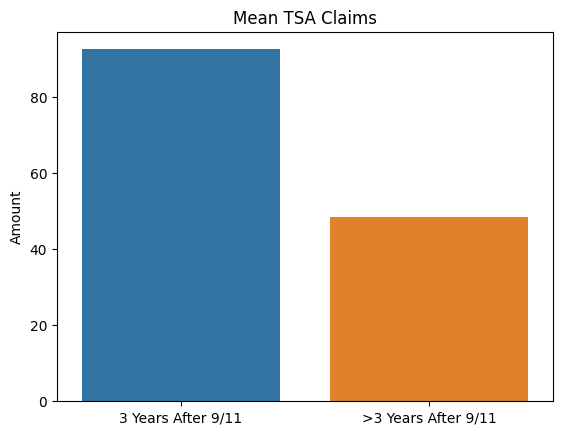

In [337]:
# Membuatkan variable dimana during_911 (kejadian setelah 3 tahun) post_911 (kejadian lebih dari 3 tahun)
during_911 = df[(df['Year']>=2002)&(df['Year']<=2004)]
post_911 = df[(df['Year']>=2005)]

# Mean dari separasi dua timeline
during_911_mean = during_911['Close Amount'].mean()
post_911_mean = post_911['Close Amount'].mean()

# membuatkan barplot untuk perbandingan
sns.barplot(x=['3 Years After 9/11', '>3 Years After 9/11'], y=[during_911_mean, post_911_mean])
plt.title('Mean TSA Claims')
plt.ylabel('Amount')
plt.show()

Bar plot diatas menunjukkan bahwa pembayaran klaim memiliki niai yang lebih tinggi pada 3 tahun awal setelah kejadian, namun hal ini masih perlu di buktikan menggunakan statistik:

In [338]:
# cek distribusi kolom Close Amount
from scipy.stats import normaltest
stats, pval=normaltest(df['Close Amount'])
print('Stats:',stats)
if pval<=0.05:
    print('Tidak Normal') 
else: 
    print('Normal') 

Stats: 253991.06380371712
Tidak Normal


Hasil dari uji ini menunjukkan bahwa dari `Close Amount` tidaklah normal, oleh karena itu, karena kita melakukan test kepada dua populasi independent, maka langkah yang tepat adalah menggunakan *mann whitney U* test untuk membuktikan hal diatas.

In [339]:
# extract the 'Close Amount' data as two separate arrays
during_911_close = during_911['Close Amount'].values
post_911_close = post_911['Close Amount'].values

In [340]:
import scipy.stats as stats

u_stat, p_val = stats.mannwhitneyu(during_911_close, post_911_close)

print(f"U-statistic: {u_stat:.4f}")

if p_val <= 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

U-statistic: 4956075752.0000
Tolak H0


Ternyata memang terbukti bahwa paska kejadian dalam 3 tahun memiliki pembayaran klaim yang lebih besar dari paska kejadian lebih dari 3 tahun, hal ini tentunya bisa dikarenakan peningkatan *security* dan juga kewaspadaan yang masih hangat 

Selanjutnya kita ingin melihat lamanya penerimaan klain setelah insiden dengan membuatkan kolom baru bernama `Days Taken`, dan kita akan mengkomparasikan lamanya hari dengan jumlah pembayaran klaim.

In [341]:
# create a new column 'Days Taken'
df['Days Taken'] = (df['Date Received'] - df['Incident Date']).dt.days

# check the new column
print(df[['Date Received', 'Incident Date', 'Days Taken']].head())

  Date Received Incident Date  Days Taken
0 2002-12-12    2002-01-04     342       
1 2004-01-16    2002-02-02     713       
2 2003-11-26    2002-02-04     660       
3 2003-01-06    2002-02-07     333       
4 2005-02-05    2002-02-18     1083      


In [342]:
# Membuat scatterplot menggunakan plotly 
fig = px.scatter(df, x='Days Taken', y='Close Amount')

# update axis dan layout labels
fig.update_layout(
    xaxis_title="Days Taken",
    yaxis_title="Close Amount",
    title_text="Relationship between Days Taken and Close Amount"
)

fig.show()

Berdasarkan scatterplot diatas, menunjukkan bahwa semakin cepat klaim diterima juga semakin besar pembayaran yang dikeluarkan kepada *passenger*, namun sebaliknya semakin lama TSA menerima klaim setelah kejadian maka semakin kecil atau bahkan mencapai titik 0 untuk klaim tersebut dibayarkan.

Untuk mendalami lagi mengenai waktu, kita perlu melihat hal apa yang mendorong terjadinya kenaikakan pada periode 2002-2004, oleh karena itu kita akan menggunakan `Claim Type` untuk mendukung analisa ini

In [343]:
# buatkan pivot table dari df, dengan memasukkan aggregate sum
pivot_table = pd.pivot_table(df, values='Close Amount', index=['Claim Type'], columns=['Year'], aggfunc=np.sum)
pivot_table

Year                        2002       2003       2004      2005      2006  \
Claim Type                                                                   
Bus Terminal            NaN      NaN        NaN        NaN       NaN         
Complaint               NaN      NaN        NaN        NaN       NaN         
Employee Loss (MPCECA)  NaN      4700.68    27025.56   6833.51   2979.64     
Motor Vehicle           525.50   0.00       1117.44    4151.32   5454.83     
Passenger Property Loss 55736.44 1091251.56 1624170.41 999428.78 723898.72   
Passenger Theft         350.00   2642.44    36236.66   1036.94   90.72       
Personal Injury         581.98   6287.25    10278.42   7046.59   6320.11     
Property Damage         82088.55 834964.69  963042.19  618680.55 530080.13   
Wrongful Death          NaN      NaN        NaN        NaN       NaN         

Year                         2007      2008      2009      2010      2011  \
Claim Type                                                                  
Bus Terminal            NaN       NaN       NaN       NaN       70.00       
Complaint               NaN       NaN       NaN       NaN       NaN         
Employee Loss (MPCECA)  137.81    761.79    610.19    656.68    734.54      
Motor Vehicle           8441.73   11041.80  10482.53  9106.43   6299.94     
Passenger Property Loss 470533.41 258852.19 188045.83 127872.31 180942.64   
Passenger Theft         100.00    0.00      821.00    NaN       NaN         
Personal Injury         2870.52   5401.55   4945.78   2659.93   5176.28     
Property Damage         387440.76 410921.92 323660.42 189316.22 274258.98   
Wrongful Death          NaN       NaN       NaN       NaN       0.00        

Year                         2012      2013      2014      2015  
Claim Type                                                       
Bus Terminal            NaN       NaN       NaN       NaN        
Complaint               0.00      247.60    0.00      100.75     
Employee Loss (MPCECA)  226.20    0.00      0.00      461.00     
Motor Vehicle           8477.96   4859.05   4376.00   6713.08    
Passenger Property Loss 212040.94 140636.56 99167.20  122442.12  
Passenger Theft         NaN       NaN       NaN       NaN        
Personal Injury         4799.50   3153.00   1529.08   2867.87    
Property Damage         252418.82 174426.78 184896.43 225811.30  
Wrongful Death          0.00      0.00      NaN       NaN

In [344]:
# dari pivot table diatas, buatkan heatmap dengan plotly
import plotly.graph_objs as go
fig = go.Figure(data=go.Heatmap(
                   x=pivot_table.columns,
                   y=pivot_table.index,
                   z=pivot_table.values.tolist(),
                   colorscale='Blues'))

fig.update_layout(title='Total Close Amount by Claim Type and Year')
fig.show()

Dari *Heatmap* diatas, terlihat yang memiliki warna cukup padat banyak pada *passenger Property loss* dan *Property Damage*, dimana, juga ditunjukkan peningkatan yang *similar* dengan grafik diatas. dimana pada tahun 2002-2004 terjadinya peningkatan yang pesat, lalu adanya penurunan dari 2004 hingga 2015 secara bertahap. Hal ini menunjukkan betapa berpengaruhnya *pasengger property loss* dan *Property damage*, menurut [USA Today](https://www.usatoday.com/story/news/2015/07/02/tsa-damage-tops-3m/29353815/), klaim dari TSA sebanyak 60% berasal dari kehilangan, kerusakan, dan pencurian barang 

Berdasarkan analisa diatas, kita bisa menjawab pertanyaan dengan:
- Kapan pembayaran klaim meningkat dan kapan menurun?
    - Kenaikan terjadi pada tahun 2002 hingga 2004, dan juga diikuti dengan penurunan secara bertahap dari 2005 hingga 2015

<br>

- Apa hubungan jangka waktu antara penerimaan dan insiden dengan pembayaran klaim?
    - hubungan antara jangka waktu antara penerimaan dan insiden dengan pembayaran tidak bisa dibuktikan secara robust, namun jangka waktu yang lebih sebentar relatif memiliki pembayaran klaim yang lebih tinggi dan lebih banyak dibandingkan dengan jangka waktu yang sudah lama
    
<br>

- Apa yang mempengaruhi naiknya pembayaran klaim dalam waktu tertentu?
    - Kenaikan yang signifikan ini bisa terjadi karena gejolak pada laporan *property loss* dan *property damage*, hal ini bisa dibuktikan dengan kesinambungannya dengan line plot di awal, bahwa pada saat 2002-2004 pembayaran mengalami kenaikan, property loss dan damage juga mengalami kenaikan yg tajam, dan sama juga berakhir pada 2005 dan turun secara bertahap, hal ini mengartikan adanya pengaruh dari property loss dan damage.

## Analisa lokasi: 

Selanjutnya, kita akan analisa berdasarkan lokasinya, dimana fitur-fiturnya tentu berkaitan dengan tempat yaitu `Airport Name`/`Airport Code` dan `Airline Name`, dengan fitur ini, maka kita bisa menjawab:
- Dimana paling banyak terjadi pembayaran klaim?
- Hal apa yang perlu diperhatikan dari lokasi?

Pertama kita kan menganalisa pada airport terlebih dahulu, `Airport Code` dan `Airport Name` mewakili hal yang sama, jadi tidak perlu menggunakan kedua, namun pada kali ini saya akan menggunakan `Airport Name` sebagai observasi:

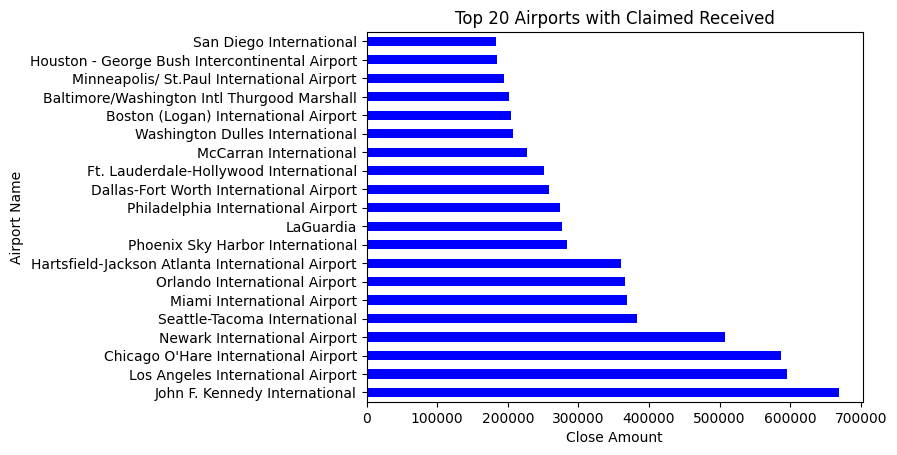

In [345]:
# membuat variable groupby bernama top20_airports
top20_airports = df.groupby('Airport Name')['Close Amount'].sum().sort_values(ascending=False)[:20]
# membuatkan plot dari groupby diatas
top20_airports.plot(kind='barh', color='blue')
plt.title('Top 20 Airports with Claimed Received')
plt.xlabel('Close Amount')
plt.ylabel('Airport Name')
plt.show()

Berdasarkan barplot diatas, **John F. Kennedy International Airport** merupakan tempat paling banyak *passenger* menerima pembayaran klaim, diikuti dengan **Los Angeles International Airport** dan juga **Chicago O'Hare International Airport**. Dimana ketiga Airport ini memiliki nilai klaim melebihi 500 Ribu Dollar. Namun apa artinya hal ini untuk keseluruhan airport? selanjutnya kita akan lihat secara perbandingan keseluruhan

<Axes: title={'center': 'Top 20 Airports vs Others'}>

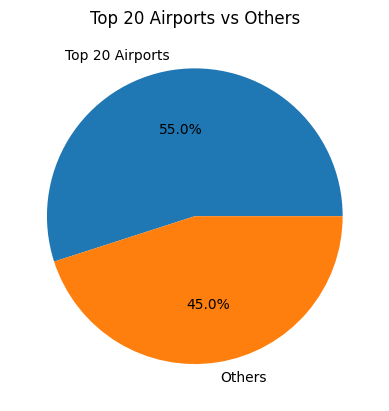

In [346]:
# grouping data airport name dan keluarkan Claim Amount
grouped_data = df.groupby('Airport Name')['Close Amount'].sum().sort_values(ascending=False)
# kita buatkan top 20 dari grouping dengan slicing lalu di sum
top_20_data = grouped_data[:20].sum()
# hal yang sama kita lakukan pada sisa dari data 
other_data = grouped_data[20:].sum()
# kita gabungkan dulu datanya 
combined_data = pd.Series([top_20_data, other_data], index=['Top 20 Airports', 'Others'])
# plotkan gabungan data dengan pie chart
combined_data.plot(kind='pie', title='Top 20 Airports vs Others', autopct='%1.1f%%')

Berdasarkan pie chart diatas, Top 20 Airport dengan ajuan klaim terbanyak sudah menutupi sekitar 55% dari keseluruhan total 473 Airport, hal ini menunjukkan bahwa 20 Airport dengan ajuan klaim terbanyak mempunyai *kontribusi* yang berpengaruh terhadap ajuan klaim. Namun hal itu belum bisa di pastikan, kita masih perlu melakukan, uji statistik, seperti biasa, hal pertama yang wajib dilakukan adalah uji normalitas pada close amount:

In [347]:
# cek distribusi kolom Close Amount
from scipy.stats import normaltest
stats, pval=normaltest(df['Close Amount'])
print('Stats:',stats)
if pval<=0.05:
    print('Tidak Normal') 
else: 
    print('Normal') 

Stats: 253991.06380371712
Tidak Normal


Terlihat bahwa uji normalitas dari close amount tidaklah normal, oleh karena itu kita akan menggunakan mannwhitney U test untuk melakukan uji statistik:

In [348]:
from scipy.stats import mannwhitneyu
# buat mask untuk 
top20_mask = df['Airport Name'].isin(top20_airports.index)

# create two groups of data: top 20 airports and others
top20_data = df.loc[top20_mask, 'Close Amount']
others_data = df.loc[~top20_mask, 'Close Amount']

# perform Mann-Whitney U test
mwu, p_value = mannwhitneyu(top20_data, others_data, alternative='two-sided')
alpha = 0.05

if p_value <= alpha:
    print('Tolak H0')
else:
    print('Terima H0')

Tolak H0


Terlihat bahwa hasil dari uji statistik yaitu tolak h0, dimana artinya ada perbedaan yang signifikan antara top 20 dengan airport yang lainnya, dengan pembuktian statistik ini, kita bisa menggunakan airport terendah dari top 20 sebagai benchmark

In [349]:
# Hitung total ajuan klaim
total_claims = df['Close Amount'].sum()
# Hitung total ajuan klaim dan Grouping per airport 
claims_per_airport = df.groupby('Airport Name')['Close Amount'].sum()
# hitung persentasenya 
percent_claims = claims_per_airport / total_claims * 100
# masukkan kedalam airport_claims_df dan buatkan DataFrame baru
airport_claims_df = pd.DataFrame({'Airport Name': percent_claims.index, '% Claims': percent_claims.values})
airport_claims_df = airport_claims_df.sort_values(by='% Claims', ascending=False)
# Reset the index of the DataFrame
airport_claims_df = airport_claims_df.reset_index(drop=True)

# tampilkan top 20, dan ambil baris terakhir
airport_claims_df.head(20).tail(1)

Airport Name  % Claims
19  San Diego International 1.53

Berdasarkan table diatas, yang paling sedikit dari top 20 Airport dengan ajuan klaim terbanyak memiliki persentase Claims di angka **1.53%** hal ini menunjukkan bahwa **benchmark** untuk airport dengan kontribusi paling berpengaruh.

hal yang sama juga akan kita aplikasikan kepada `Airline Name`

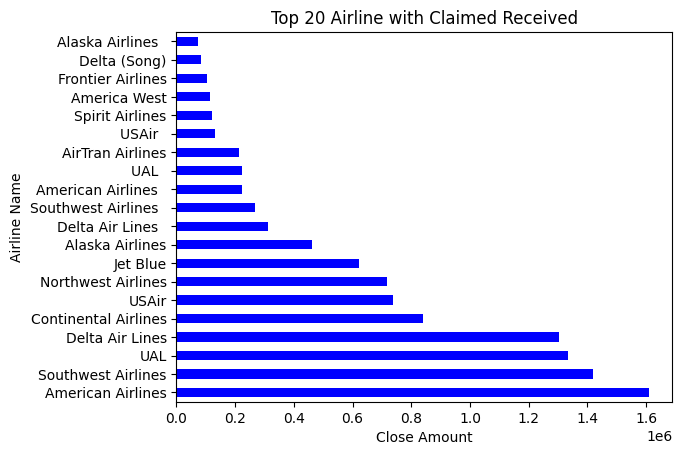

In [350]:
# Groupby dan plotting menggunakan Airline Name
top20_airline = df.groupby('Airline Name')['Close Amount'].sum().sort_values(ascending=False)[:20]
top20_airline.plot(kind='barh', color='blue')
plt.title('Top 20 Airline with Claimed Received')
plt.xlabel('Close Amount')
plt.ylabel('Airline Name')
plt.show()

Barplot diatas menunjukkan bahwa **American Airlines** merupakan Airline yang paling banyak dan diikuti juga dengan **UAL dan Delta Air Lines**, dimana ketiganya berada diatas 6 juta dollar. dengan ini kita akan lihat perbandingan dari 20 Airline ini dibandingkan dengan yang lainnya

<Axes: title={'center': 'Top 20 Airline vs Others'}>

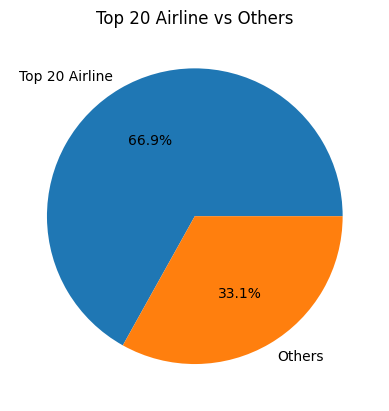

In [351]:
# grouping by airline name 
grouped_airline_data = df.groupby('Airline Name')['Close Amount'].sum().sort_values(ascending=False)

# indexing top 20
top_20_airline_data = grouped_airline_data[:20].sum()
other_airline_data = grouped_airline_data[20:].sum()

# gabungkan data
combined_airline_data = pd.Series([top_20_airline_data, other_data], index=['Top 20 Airline', 'Others'])

# plotkan menjadi piechart
combined_airline_data.plot(kind='pie', title='Top 20 Airline vs Others', autopct='%1.1f%%')

Ternyata menurut barplot diatas, bahwa kontribusinya melebihi 50%, yaitu berada di angka 66.9%, hal ini mengartikan bahwa 20 dari 317 mempunyai dampak besar yaitu 65.5% dari keseluruhan pembayaran klaim, namun hal ini tetap memerlukan uji sttatistik untuk mengetahui signifikansinya

Dengan mengetahui bahwa `Close Amount` memiliki distribusi tidak normal, kita akan langsung menguji dengan menggunakan mannwhitney U test:

In [352]:
from scipy.stats import mannwhitneyu

# create a boolean mask to filter data for top 20 airports
top20_mask = df['Airline Name'].isin(top20_airline.index)

# create two groups of data: top 20 airports and others
top20_data = df.loc[top20_mask, 'Close Amount']
others_data = df.loc[~top20_mask, 'Close Amount']

# perform Mann-Whitney U test
mwu, p_value = mannwhitneyu(top20_data, others_data, alternative='two-sided')
alpha = 0.05

if p_value <= alpha:
    print('Tolak H0')
else:
    print('Terima H0')

Tolak H0


Hasil dari uji statistik yaitu menolak H0, oleh karena itu bisa dipastikan perbedaan antara top 20 airline ini berbeda dengan airline lainnya, oleh karena itu airline terkecil dari top 20 bisa dijadikan **benchmark**

In [353]:
# Hitung total ajuan klaim
total_claims = df['Close Amount'].sum()
# Hitung total ajuan klaim dan Grouping per airport 
claims_per_airline = df.groupby('Airline Name')['Close Amount'].sum()
# hitung persentasenya 
percent_claims = claims_per_airline / total_claims * 100
# masukkan kedalam airline_claims_df dan buatkan DataFrame baru
airline_claims_df = pd.DataFrame({'Airline Name': percent_claims.index, '% Claims': percent_claims.values})
airline_claims_df = airline_claims_df.sort_values(by='% Claims', ascending=False)
# Reset the index of the DataFrame
airline_claims_df = airline_claims_df.reset_index(drop=True)

# tampilkan top 20, dan ambil baris terakhir
airline_claims_df.head(20).tail(1)

Airline Name  % Claims
19  Alaska Airlines   0.61

Persentas claim dari top 20 Airline name yang paling kecil mempunyai nilai 0.61%, dan hal ini bisa dijadikan sebagai **benchmark** untuk Airline yang paling banyak menerima ajuan klaim.

Dengan analisa diatas, kita bisa menjawab pertanyaan:
- Dimana paling sering terjadinya pembayaran klaim?
    - Pengajuan klaim paling sering terjadi di Airport John F Kennedy, sedangkan Airline yang memiliki pembayaran klaim terbesar ada pada American Airline  
- Hal apa yang perlu diperhatikan dari lokasi?
    - Ada beberapa hal yang perlu diperhatikan, seperti airport yang berkontribusi besar yaitu airport yang persentase pembayaran klaim sebesar 1.53%, hal ini perlu diperhatikan sebagai acuan dan konsiderasi dalam melakukan improvement, hal itu juga berlaku untuk Airline, dimana pembayaran klaim yang lebih besar dari 0.61% memiliki proporsi sebesar 66.9% dari seluruh pembayaran klaim 

## Analisa klaimnya: 

Analisa berdasarkan klaimnya memiliki beberapa fitur, fitur-fitur tersebut adalah Claim Type, Claim Site dan Item, dengan ini kita bisa menjawab pertanyaan:
- Tipe dan tempat klaim apa yang memiliki pembayaran klaim tertinggi?
- barang apa yang pembayaran klaimnya tinggi?
- Hal apa yang harus di perhatikan dari tipe, tempat dan barang klaim?

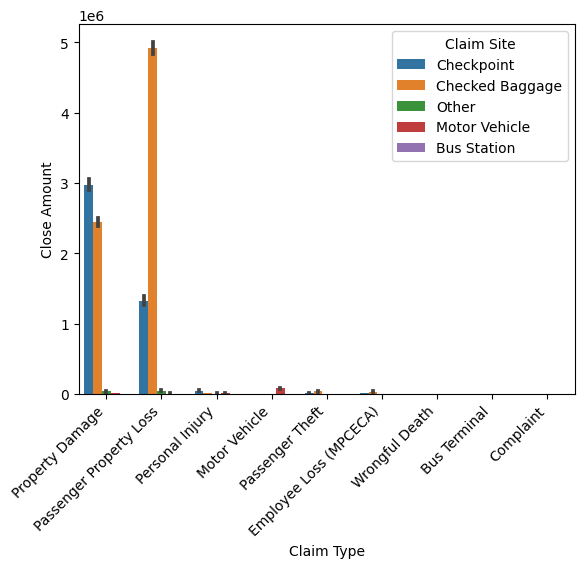

In [354]:
# Create a stacked bar chart with count of Claim Site by Claim Type and Close Amount as the size of the bar
sns.barplot(data=df, x='Claim Type', y='Close Amount', hue='Claim Site', estimator=sum)
plt.xticks(rotation=45, ha='right')
plt.show()

Bar chart diatas melihatkan bahwa Checkpoint merupakan tempat yang paling banyak pembayaran claimnya dalam hal *property damage*, namun untuk *property loss* paling banyak berada di Checked Baggage. dapat terlihat juga dengan jelas peran dari tipe klaim lainnya hampir tidak terlihat.

Sekarang kita akan melihat `Item`,

In [355]:
# assume df is your original DataFrame
# get the sum of Close Amount for each item and sort in descending order
item_sum = df.groupby('Item')['Close Amount'].sum().sort_values(ascending=False)

# keep only the top 10 items
top_10_items = item_sum.index[:10]
df_top_10 = df[df['Item'].isin(top_10_items)]

# create a treemap using plotly express with the modified DataFrame
fig = px.treemap(df_top_10, path=['Item'], values='Close Amount')

# show the treemap
fig.show()

Dalam treemap ini, terlihat bahwa barang-barang yang memiliki pembayaran klaim tertinggi berasal dari barang-barang yang secara materil relatif mahal, hal ini seperti komputer, jewelry, kamera, dll. Selain relatif memiliki nilai yang mahal, barang-barang tersebut juga merupakan barang yang *common*, atau barang-barang yang paling sering dibawa, contohnya seperti Clothing, luggage, eyeglasses, currency, cosmetics dan baggage merupakan barang yang sering di bawa, terutama luggage dan baggage yang merupakan barang yang paling kita sering lihat di bandara.

Mari kita lihat bagaimana perbandingan barang-barang ini jika dibandingkan dengan barang-barang lainnya:

<Axes: title={'center': 'Top 10 Item vs Others'}>

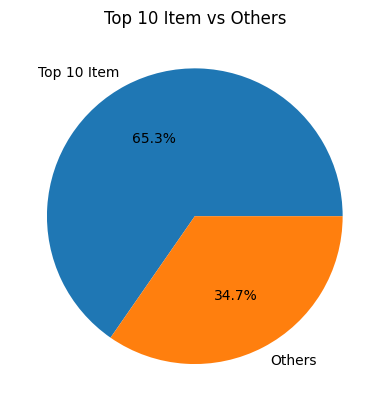

In [356]:
# grouping by Item 
grouped_item_data = df.groupby('Item')['Close Amount'].sum().sort_values(ascending=False)

# indexing top 10
top_10_item_data = grouped_item_data[:10].sum()
other_item_data = grouped_item_data[10:].sum()

# gabungkan data 
combined_item_data = pd.Series([top_10_item_data, other_data], index=['Top 10 Item', 'Others'])

# plot menggunakan Piechart
combined_item_data.plot(kind='pie', title='Top 10 Item vs Others', autopct='%1.1f%%')

Ternyata 10 barang-barang tertinggi memiliki nilai pembayaran klaim yang besar, sekitar 65.3% dari total pembayaran klaim, hal ini menunjukkan betapa banyaknya pengaruh barang-barang top 10 ini. namun kita perlu melakukan test statistik, dengan menggunakan mannwhitney U dengan `Close Amount` yang sudah teruji **Tidak Normal**, tentunya menggunakan mannwhitney U test karena yang kita test adalah 2 populasi Independent

Tidak melakukan normality test lagi karena sudah dilakukan dan membuktikan bahwa `Close Amount` **tidak berdistribusi normal**

In [357]:
from scipy.stats import mannwhitneyu
# create two groups of data: top 10 items and others
top10_data = df[df['Item'].isin(top_10_items)]['Close Amount']
other_data = df[~df['Item'].isin(top_10_items)]['Close Amount']

# perform Mann-Whitney U test
mwu, p_value = mannwhitneyu(top10_data, other_data, alternative='two-sided')
alpha = 0.05

if p_value <= alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


Ternyata hasil dari uji mannwhitney U membuktikan secara signifikan bahwa barang top 10 memiliki perbedaan dengan barang-barang lainnya. dengan ini, kita bisa menggunakan top 10 sebagai **benchmark**

In [358]:
# Hitung total ajuan klaim
total_claims = df['Close Amount'].sum()
# Hitung total ajuan klaim dan Grouping per airport 
claims_per_item = df.groupby('Item')['Close Amount'].sum()
# hitung persentasenya 
percent_claims = claims_per_item / total_claims * 100
# masukkan kedalam item_claims_df dan buatkan DataFrame baru
item_claims_df = pd.DataFrame({'Item': percent_claims.index, '% Claims': percent_claims.values})
item_claims_df = item_claims_df.sort_values(by='% Claims', ascending=False)
# Reset the index of the DataFrame
item_claims_df = item_claims_df.reset_index(drop=True)

# tampilkan top 20, dan ambil baris terakhir
item_claims_df.head(10).tail(1)

Item  % Claims
9  Baggage 1.21

Untuk `Item`, dari top 10, persentase pembayaran klaim terkecilnya berada di angka **1.21%**, menunjukkan bahwa barang dengan persentase pembayaran klaim lebih besar dari **1.21%**, maka pengaruhnya ada sekitar 60% dari keseluruhan barang.

Berdasarkan analisa diatas, kita dapat menjawab pertanyaan
- Tipe dan tempat klaim apa yang memiliki pembayaran klaim tertinggi?
    - Tipe didominasi dengan banyaknya property loss dan property damage, namun untuk tempat klaim menyesuaikan dengan tipe klaimnya, untuk property loss memiliki kecenderungan check baggage sebagai tempat klaimnya, namun untuk property damage memiliki Checkpoint pada tempat klaimnya
- barang apa yang pembayaran klaimnya tinggi?
    - barang yang paling tinggi adalah komputer, dan barang-barang lain yang memiliki nilai relatif tinggi dan cukup *common* dibawa masuk kedalam 10 barang terbanyak dalam hal pembayaran klaim
- Hal apa yang harus di perhatikan dari tipe, tempat dan barang klaim?
    - Untuk tipe, menunjukkan dengan jelas bahwa pengajuan didominasi dengan property damage dan property loss, hal ini menunjukkan bahwa permasalahan hanya akan berputar di hal tersebut, dan untuk tempat klaim (`Claim site`), menyesuaikan dengan tipe kejadian, namun untuk Checkpoint kebanyakan terjadi karena property damage, sedangkan kalau checked baggage kebanyakan terjadi karena property loss. Dan yang terakhir hal yg harus diperhatikan dari barang adalah barang-barang dengan nilai relatif tinggi dan cukup *common* untuk dibawa, dengan lebih detailnya penting untuk memperhatikan barang dengan persentase pembayaran klaim diatas **1.21%**

## Analisa nilai klaimnya: 

Berdasarkan nilainya, fitur-fiturnya adalah `Claim Amount` dan `Close Amount`, disini kita bisa menjawab **bagaimana pengaruh nilai klaim terhadap pembayaran klaim?**

Disini kita akan membuatkan tabel korelasi, namun sebelum itu wajib untuk mencari tahu distribusi dari data kita, oleh karena itu (walaupun `Close Amount` sudah kita test normalitasnya, kita akan melakukannya lagi agar lebih *proper*) kita akan menjalankan test distribusi kepada `Claim Amount` dan `Close Amount`:

In [359]:
# Cek Normality 
# cek distribusi kolom Claim Amount
from scipy.stats import normaltest
stats, pval=normaltest(df['Claim Amount'])
if pval<=0.05:
    print('tidak normal') 
else: 
    print('normal') 

tidak normal


Ternyata pada `Claim Amount` terbukti tidak memiliki distribusi yang normal

In [360]:
# Cek Normality 
# cek distribusi kolom Close Amount
from scipy.stats import normaltest
stats, pval=normaltest(df['Close Amount'])
if pval<=0.05:
    print('tidak normal') 
else: 
    print('normal')  

tidak normal


Seperti yang kita ketahui bahwa `Close Amount` juga tidak berdistribusi normal

Oleh karena keduanya tidak berdistribusi normal, untuk menjalankan korelasi kita akan menggunakan **spearman** dimana merupakan test non-parametric

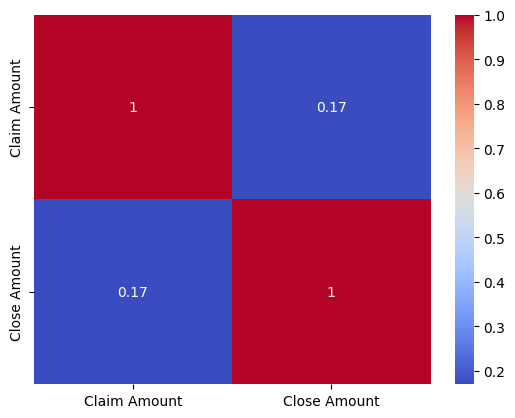

In [361]:
# Metode spearman (karena normalitas tidak terpenuhi)
sns.heatmap(df[['Claim Amount','Close Amount']].corr('spearman'), annot=True, cmap='coolwarm')
plt.show()

Berdasarkan hasil heatmap diatas, menunjukkan bahwa Claim Amount berkorelasi dengan Close Amount secara positif, artinya setiap Claim Amount mengalami kenaikan, Close Amount juga mengalami kenaikan, **Namun** hal ini tidaklah signifikan, dikarenakan korelasi keduanya hanya terukur 0.17, dimana angka itu terbilang sangat lemah ([Patrick Schober, MD, PhD](https://www.researchgate.net/publication/323388613_Correlation_Coefficients_Appropriate_Use_and_Interpretation)). 

Dengan ini kita bisa menjawab, **bagaimana pengaruh nilai klaim terhadap pembayaran klaim?**
 - Claim Amount berpengaruh positif yang artinya dengan naiknya Claim Amount akan menaikkan Close Amount, namun perlu di perhatikan bahwa pengaruh dari klaim amount ini terbilang cukup lemah, hanya di sekitar 0.17, atau bisa dibilang pengaruhnya kurang signifikan 

## Analisa berdasarkan process klaim:

Berdasarkan prosesnya, fitur-fitur yang bersangkutan adalah Disposition dan Status, dengan ini kita bisa menjawab:
- Disposition dan status apa yang paling sering muncul?
- Hal apa yang perlu di perhatikan pada disposition dan status?

Hal pertama yang dilakukan adalah membuat sunburst untuk melihat proporsi dari status untuk tiap Dispositionnya

In [362]:
# group the data by disposition and status, and count the number of occurrences
df_counts = df.groupby(['Disposition', 'Status']).size().reset_index(name='Count')

# create the sunburst chart with disposition and status as the hierarchy levels, and the count as the values
fig = px.sunburst(df_counts, path=['Disposition', 'Status'], values='Count')

# show the chart
fig.show()

berdasarkan sunburst diatas, membuktikan bahwa status approve akan lari ke disposition Approve in Full, sama halnya dengan Settle akan lari ke disposition settled, namun untuk disposition denied tidak selalu menerima deny, dimana ada juga Canceled, contractor claim dan In litigation, hal ini menunjukkan bahwa banyaknya status tersebut berpotensi akan terjadinya penolakan. dan untuk No status, Insufficent dan juga canceled lagi bisa berpotensi *undetermined* dimana hal itu masih belum diketahui atau belum di tentukan bagaimana suatu klaim akan berakhir.

Selanjutnya kita akan ke disposition lebih detail,

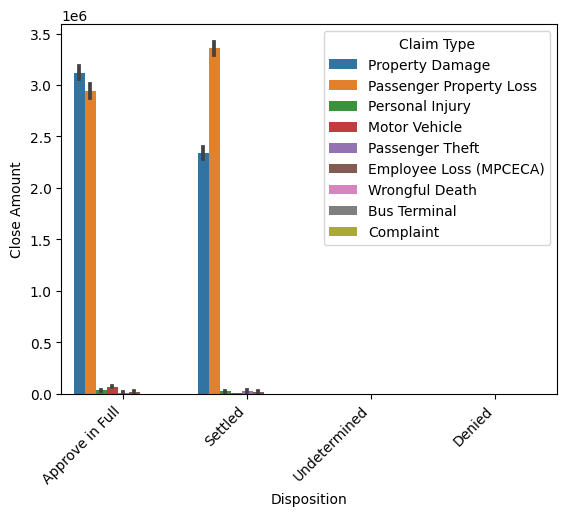

In [363]:
sns.barplot(data=df, x='Disposition', y='Close Amount', hue='Claim Type', estimator=sum)
plt.xticks(rotation=45, ha='right')
plt.show()

Melalui bar chart diatas, dinyatakan bahwa Approve in Full dengan property damage memiliki pembayaran klaim terbanyak, sedangkan settled memiliki property loss terbanyak. dan tentunya undetermined dan denied tidak memiliki nilai closed amount, karena adanya penolakan dan juga hal yang belum bisa di jelaskan.

Dengan ini kita bisa menjawab:
- Disposition dan status apa yang paling sering muncul?
    - Disposition paling sering muncul adalah Denied sekitar 50%, dan status yang paling sering muncul adalah Deny
- Hal apa yang perlu di perhatikan pada disposition dan status?
    - Perlu di perhatikan bahwa property loss dan property damage merupakan tipe klaim yang paling sering diterima karena memiliki nilai paling tinggi pada approve in full dan settled, hal ini mungkin terjadi karena bukti kehilangan atau kerusakan barang lebih mendukung proses klaim dibandingkan tipe tipe lainnya.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang pembayaran klaim:
- *unexpecter event* seperti 9/11 bisa menjadi penyebab utama kenaikan property loss dan property damage namun hal ini masih memerlukan penelitian lebih dalam
- Semakin lama waktu penerimaan klaim setelah insiden maka kemungkinan pembayaran klaim akan berkurang
- Meningkatnya ajuan klaim dalam waktu tertentu juga banyak disebabkan oleh *Passenger property loss* dan *Property damage*
- Airport dengan pembayaran klaim terbanyak adalah **John F Kennedy** dan Airline dengan pembayaran klaim terbanyak adalah **American Airline**
- Tempat klaim yang terbanyak adalah Checked baggage dan Checkpoint diikuti dengan tipe *Passenger property loss* dan *Property damage*
- Item dengan harga yang relatif mahal memiliki pembayaran klaim terbanyak, seperti komputer, jewelry, kamera, cosmetic, etc. 
- Adanya pengaruh positif dari jumlah klaim terhadap pembayaran klaim, Namun cukup lemah
- Pembayaran klaim yang berhasil dibayarkan hanya dari status approve dan settle, sedangkan yang lainnya akan berakhir Denied atau Undetemined 
- Pembayaran klaim yang berhasil juga paling banyak berasal dari property loss dan property damage


Hal yang perlu di perhatikan:

- Kejadian *unexpected event*
- Banyak terjadi klaim karena masalah *property* yang hilang dan rusak
- Airport dan Airline dengan masing-masing *benchmark*, Dimana airport dengan total pembayaran klaim lebih dari 1.53% dan Airline dengan total pembayaran klaim melebihi 0.6%, sama-sama berkontribusi lebih dari 50% pembayaran klaim 
- Item yang secara materil memiliki nilai yang tinggi
- Jumlah ajuan yang berpotensi meningkatkan pembayaran klaim 
- Property loss dan property damage memiliki pembayaran klaim yang paling banyak di Approve dan di Settle

**Rekomendasi** 

1. Membangun Sistem Manajemen Krisis, Dimana sistem ini harus meliputi prosedur yang jelas dalam menangani *unexpected event*, dan yang terpenting yaitu menangani **dampak pasca insiden**.

2. Komunikasi kepada *passenger* dengan mewajibkan untuk memotret bagasi miliknya pada saat menaruh bagasi ataupun sebelum masuk ke area tunggu, hal ini dapat meminimalisir adanya kehilangan barang, karena dengan foto dari koper ataupun bawaan dari *passenger* bisa membantu petugas untuk mencarikannya sesuai foto bila terjadi kehilangan. akan lebih baik hal ini wajib di cek kepada seluruh *passenger* sebelum mereka sampai ke titik *checkpoint* atau *baggage check*
3. Memberikan arahan kepada officer untuk mulai mengimplementasikan sistem *ranking*, dimana akan meminimalisir terjadinya kerusakan pada barang yang harganya cukup mahal. hal ini lebih baik diimplementasikan kepada barang yang pembayaran klaimnya (Close Amount) diatas **0.63%**, artinya barang-barang itu akan lebih di prioritaskan
4. Memberikan pelatihan lebih pada officer TSA yang berada pada Airport **JFK**, namun **akan lebih baik** untuk memberikan pelatihan kepada airport dengan persentase pembayaran klaim diatas **1.53%**
5. Bekerja sama dengan Airlines untuk meningkatkan *baggage handling* dan mengutamakan Airline **American Airline**, dan pastinya akan lebih baik untuk mengimplementasikan hal yang sama pada airline dengan pembayaran klaim diatas **0.61%**


Dengan memperhatikan hal-hal yang direkomendasikan, diharapkan analisa ini dapat meminimalisir kerugian pembayaran klaim.

# Export data ke Excel dan CSV

Melakukan export data yang bersih, kedalam Excel untuk membuat Story pada Tableau dan csv untuk mempunyai perbandingan data 

In [364]:
# df.to_excel('tsa_bersih.xlsx', index=False)

In [365]:
# df.to_csv('tsa_bersih.csv',index=False)